In [1]:
import numpy as np
import lightcone_FRB_decreasingz_xlos as lc
import os
import DM
import h5py
import matplotlib.pyplot as pl
import matplotlib as mpl
import misc_functions as misc
from scipy import stats
import lightcone_FRB_decreasingz_xlos_forHaloFinder as lcH
from datetime import datetime
DATE = datetime.today().strftime('%Y-%m-%d')
cmap2 = mpl.colors.ListedColormap(['k', 'yellow'])
cmap3 = mpl.colors.ListedColormap(['k', 'white'])
pl.rcParams["font.family"] = "Times New Roman"
pl.rcParams['ytick.labelsize']=24
pl.rcParams['xtick.labelsize']=24
%load_ext autoreload
%autoreload 2
%matplotlib inline

def release_list(a):
    del a

In [2]:
#constants
pc = 3.08*10**16 # pc in terms of m
cm2m = 0.01 #cm to m conversion

In [3]:
#resolutions of the boxes
HII_DIM = 200  #hi-res
DIM = 800      #low-res
#do we want to truncate the lightcone after a certain redshift? 
lightcone_sharpcutoff = False



In [57]:
#what is the redshift range spanned by the halo files?
z_range_of_halo_boxes = np.linspace(9.6, 6.0, 19)
z_range_of_halo_boxes = np.linspace(9.6, 0.2, np.round(float(9.6)/float(0.2),2))
print(z_range_of_halo_boxes)

#load halos (i.e. FRBs)
halo_directory = '/Users/michael/Research/LAE_Clustering/Simulation_Boxes/MturnHaloes5e8_zeta25_MturnxHII5e8_beta1_fullEoR_Seed200_xLos/'

#load all the halopos for all the redshifts and store them into a single array
Halopos_z = np.zeros((len(z_range_of_halo_boxes)), dtype = object)
for z in range(Halopos_z.shape[0]):
    if z_range_of_halo_boxes[z] < 6.0:
        print('switching to the same box')
        #switch to the same box over and over (because those boxes aren't made yet)
        box = 'halos_z9.60_800_300Mpc_82600201'
        Halopos_z[z] = np.genfromtxt(halo_directory + box, dtype=None)
        #save the lightcone should something go very very wrong
        #np.savez('/Volumes/Tubster/Halopos_z'+str(np.round(z_range_of_halo_boxes[z],1))+'.npz', Halopos_z = Halopos_z[z])
    else:
        box = 'halos_z'+str(np.round(z_range_of_halo_boxes[z],1))+'0_800_300Mpc_82600201'
        box = 'halos_z9.60_800_300Mpc_82600201'
        Halopos_z[z] = np.genfromtxt(halo_directory + box, dtype=None)
        
        #save the lightcone should something go very very wrong
        #np.savez('/Volumes/Tubster/Halopos_z'+str(np.round(z_range_of_halo_boxes[z],1))+'.npz', Halopos_z = Halopos_z[z])
        
    print('Done redshift' + str(np.round(z_range_of_halo_boxes[z],1)))
    
#save the lightcone should something go very very wrong
#np.savez('/Volumes/Tubster/Halopos_z.npz', Halopos_z = Halopos_z)


/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
Done redshift9.6
Done redshift9.4
Done redshift9.2
Done redshift9.0
Done redshift8.8
Done redshift8.6
Done redshift8.4
Done redshift8.2
Done redshift8.0
Done redshift7.8
Done redshift7.6
Done redshift7.4
Done redshift7.2
Done redshift7.0
Done redshift6.8
Done redshift6.6
Done redshift6.4
Done redshift6.2
Done redshift6.0
switching to the same box
Done redshift5.8
switching to the same box
Done redshift5.6
switching to the same box
Done redshift5.4
switching to the same box
Done redshift5.2
switching to the same box
Done redshift5.0
switching to the same box
Done redshift4.8
switching to the same box
Done redshift4.6
switching to the same box
Done redshift4.4
switching to the same box
Done redshift4.2
switching to the same box
Done redshift4.0
switching to the same box
Done redshift3.8
switchin

In [32]:
#directory to get the ionization boxes (for lightcone and ionization fied and density field)
io_boxes ='/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/'
oi_boxes = '/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/beta_-1_xH_fields/'

betas = (1, -1)
ionization_boxes = (io_boxes, oi_boxes)
density_boxes = '/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/'



In [171]:
#make lightcone for the Halo field!

#uncomment the stuff below, I just ran it, and didn't want to re-run it again but there is nothing wrong with it
#Halo_Position_Box = np.zeros((len(z_range_of_halo_boxes), HII_DIM, HII_DIM, HII_DIM))
#Halo_Mass_Box = np.zeros_like(Halo_Position_Box)
#for z in range(len(z_range_of_halo_boxes)):
#    Halo_Position_Box[z] , Halo_Mass_Box[z] = misc.map2box(Halopos_z[z], HII_DIM)

print(np.linspace(np.max(z_range_of_halo_boxes), z_end, nboxes))

z_end = 0.2  
box_slice = 199
Halo_lightcone, halolightcone_redshifts = lcH.lightcone(DIM = HII_DIM, halo_boxes_z =  Halo_Position_Box, z_range_of_boxes = np.linspace(np.max(z_range_of_halo_boxes), z_end, nboxes), box_slice = int(box_slice), directory = ionization_boxes[0] , return_redshifts = True, marker = 'halos')

print(Halo_lightcone.shape)  

    


/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
(9.6, 0.2, 48)
(2399, 200, 200)


In [434]:
#make lightcone for each redshift, beta and slice

z_end = 0.2
nboxes = np.round(float(z_range_of_halo_boxes[0])/float(z_end),1)

xH_lightcone_beta_Dictionary = {}
densitylightcone_beta_Dictionary = {}
for b in range(len(betas)):
    print('doing beta ' + str(betas[b]) )
    #make the lightcone for each quantity
    box_slice = HII_DIM - i -1
    xH_lightcone_beta_Dictionary[str(betas[b])] , lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_range_of_boxes = np.linspace(np.max(z_range_of_halo_boxes), z_end, nboxes), box_slice = int(box_slice), directory =  ionization_boxes[b], return_redshifts = True )

densitylightcone_beta_Dictionary[str(betas[0])] = lc.lightcone(DIM = HII_DIM, z_range_of_boxes = np.linspace(np.max(z_range_of_halo_boxes), z_end, nboxes), box_slice = int(box_slice), directory = ionization_boxes[0] , marker = 'updated_smoothed_deltax')

print('Done!')

doing beta 1
[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
(9.6, 0.2, 48)
[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]


/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


TypeError: cannot concatenate 'str' and 'int' objects

/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


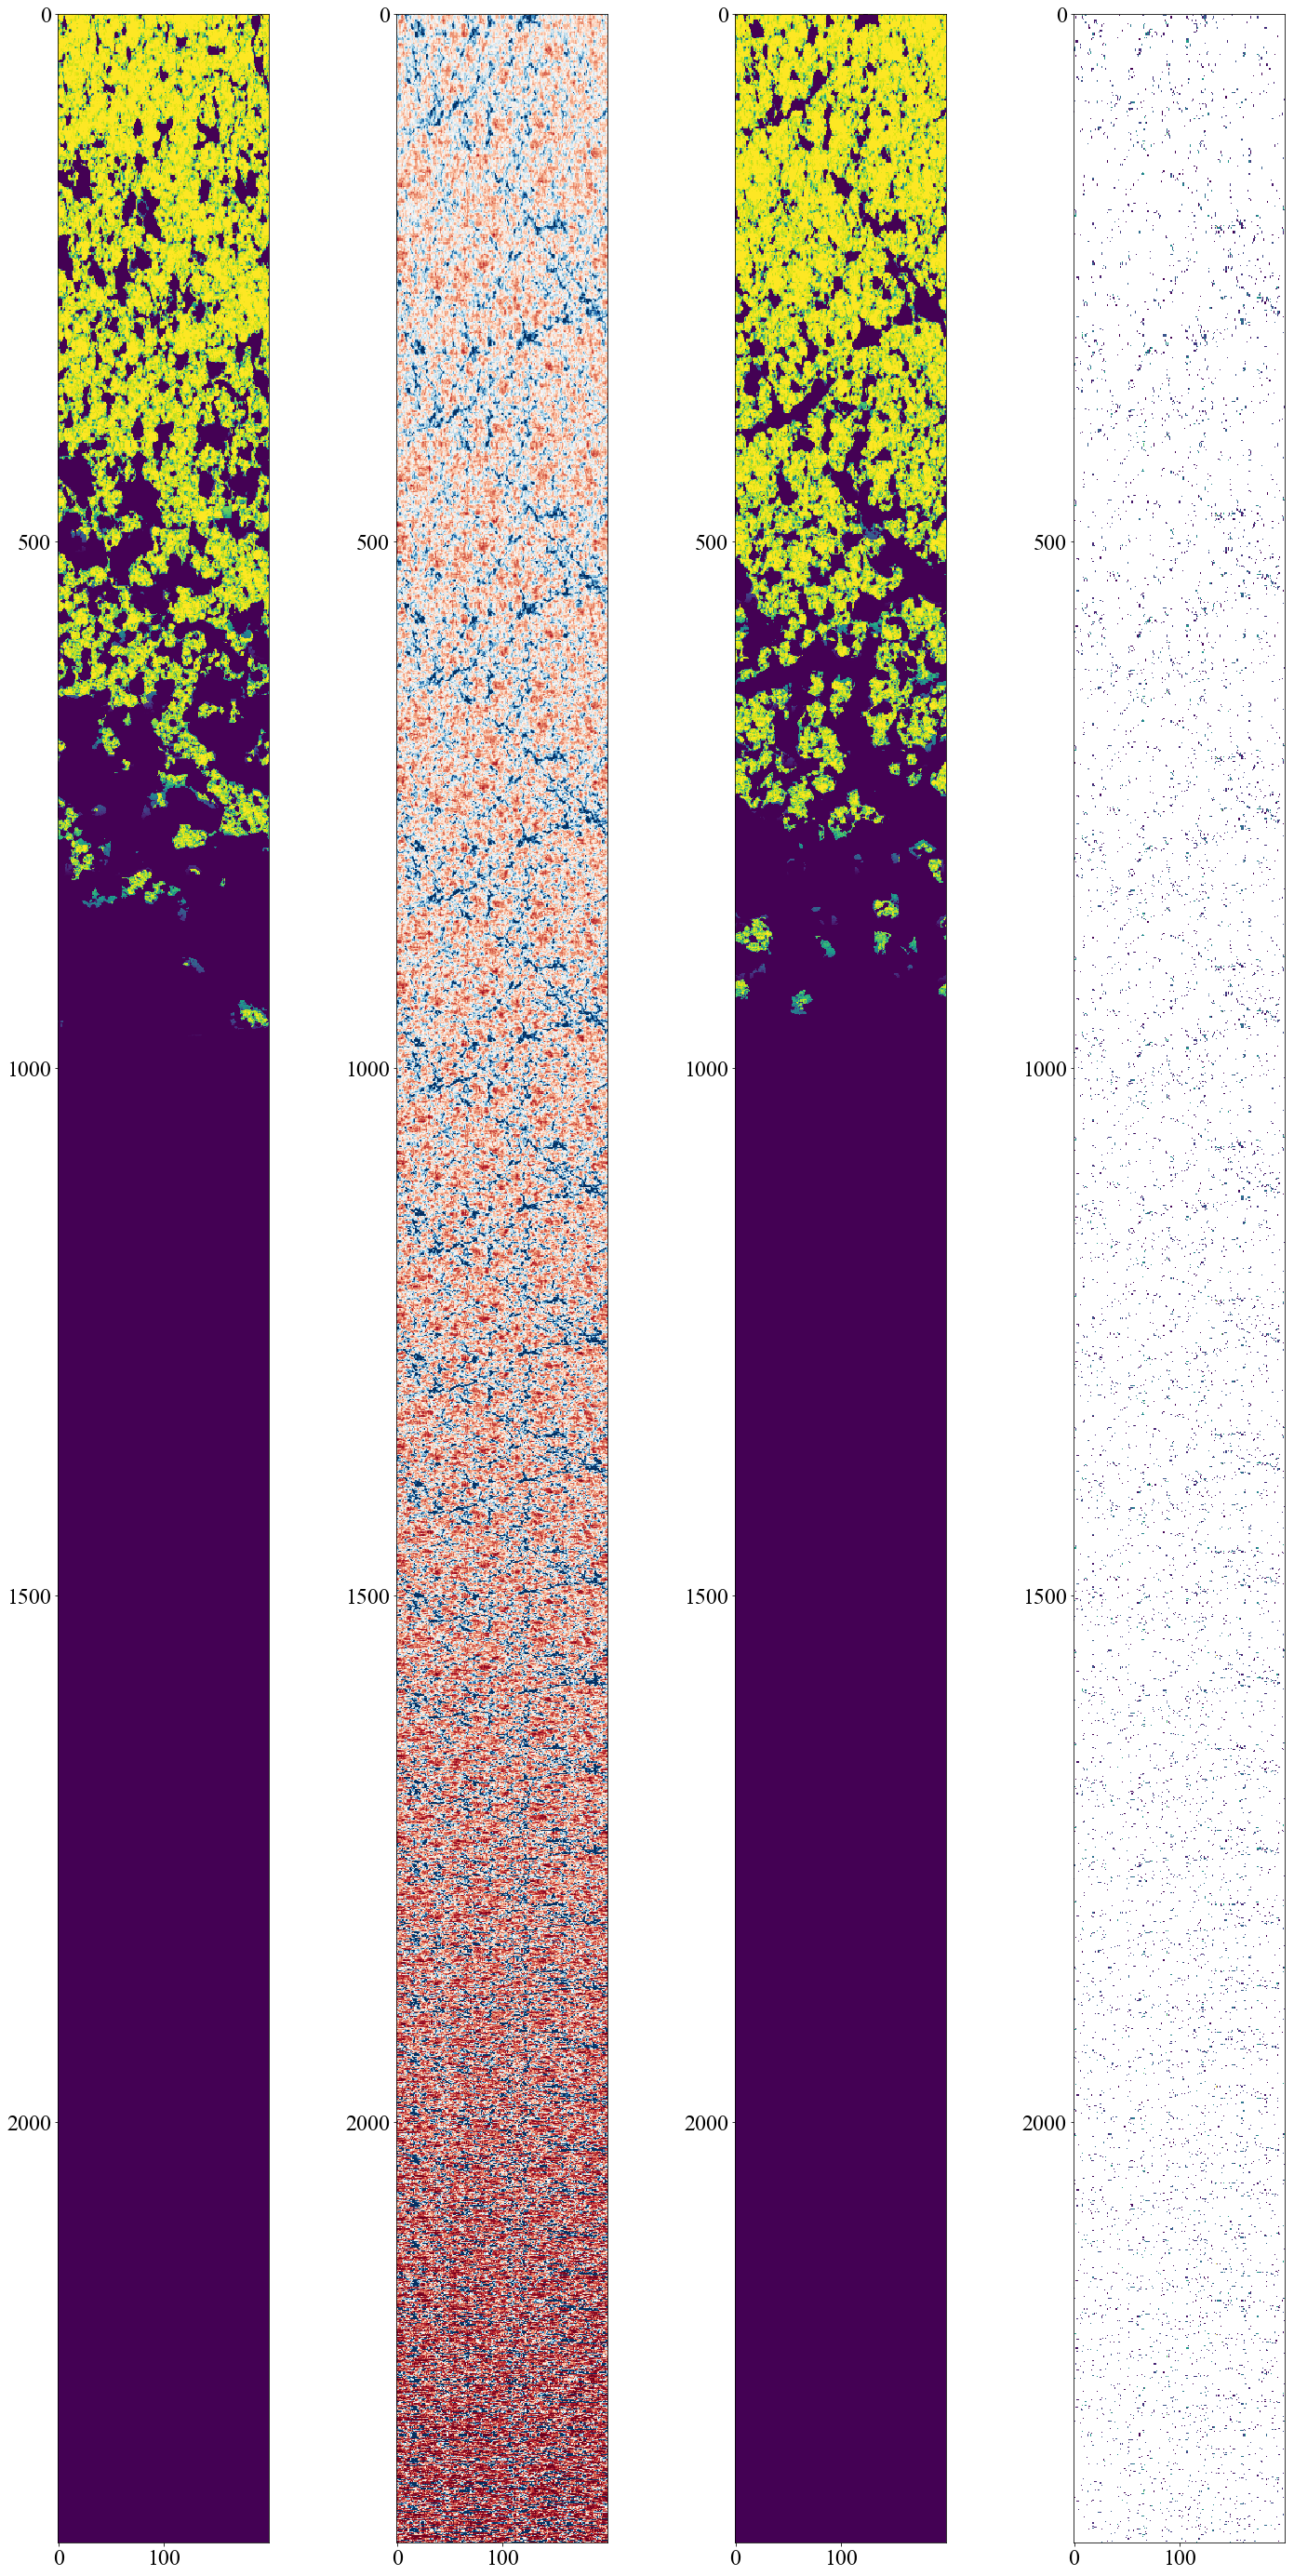

In [166]:
#double check the lightcones

fig, (ax1, ax2, ax3, ax4) = pl.subplots(1, 4)
fig.set_figheight(50)
fig.set_figwidth(25)
ax1.imshow(xH_lightcone_beta_Dictionary['-1'][:,0,], aspect = 1)
ax2.imshow(densitylightcone_beta_Dictionary['1'][:,0,], cmap = 'RdBu', vmin = np.min(densitylightcone_beta_Dictionary['1'][:,0,]), vmax = 1 )
ax3.imshow(xH_lightcone_beta_Dictionary['1'][:,0,], aspect = 1)
ax4.imshow(np.log(Halo_lightcone[:,0,]), cmap = 'viridis', aspect = 1)
y_positions = np.arange(0,lightcone_redshifts.shape[0],10)
#ax1.set_yticklabels(y_positions, np.round(lightcone_redshifts[::10],2))
#ax2.set_yticklabels(y_positions, np.round(lightcone_redshifts[::10],2))


pl.show()
pl.close()



In [223]:
#the logic flow is as follows. We first decide on the redshift in which we would like to compute the DM distribution
#of FRBs. Let us set that to be z = 9.6 for now

print(np.count_nonzero(Halo_lightcone[0]))
#now let us get the list of FRBs at this redshift. Remember, we have only one single lightcone, and the 'origin'
#of z = 9.6 is at the box_slice of 199 (totally convention). By isotropy this could actually be any slice of 
#the theory box, but we still stick with the last slice for now. Now let us loop through the halo list, and 
#find ALL halos at that location in the box. In the future, let us generalize this into a function that does it for us
#the halos are from 21cmFAST and stored in Halo_Mass_Box[z] where z is the location of the theory box
#(not the box slice)
#also note, that we can remove slice = 199 in the dictionary since now we won't have to differentiate between
#different slices

num_redshifts_in_array = 12

DM_z_beta_y_z = np.zeros((, len(betas) , HII_DIM, HII_DIM  ))
n_FRBs_z = np.zeros((25))
z_we_are_actually_using = np.zeros((25))
#start with z = 9.6 for now (redshift = 0 index)
for red_idx in range(25):
    red = int(red_idx*100)
    z_we_are_actually_using[red_idx] =  lightcone_redshifts[red]
    print('Doing z' , lightcone_redshifts[red])
    for y in range(HII_DIM):
        for z in range(HII_DIM):
            #if Halo_lightcone[red][y][z] != 0:
            #    n_FRBs_z[red_idx] += 1
                
                #there is an FRB there (add FDUTY in the future) #actually use FDUTY to parametrize likelihood of
                #hitting ANOTHER halo at that pixel
            #for b in range(len(betas)):
                DM_z_beta_y_z[red_idx][b][y][z] = DM.compute_DM(y,z, xH_lightcone_beta_Dictionary[str(betas[b])][red:,:,], densitylightcone_beta_Dictionary[str(betas[0])][red:,:,],  lightcone_redshifts[red:], Halo_lightcone[red:])    
    #if the previous sum over all LoS is less than this sum of all LoS (at lower z), then raise flag
    print(0.01**3*np.sum(DM_z_beta_y_z[red_idx][0])/(n_FRBs_z[red_idx]*pc), n_FRBs_z[red_idx])
    
    if np.sum(DM_z_beta_y_z[red_idx][0])/(n_FRBs_z[red_idx]) > (np.sum(DM_z_beta_y_z[red_idx-1][0])/(n_FRBs_z[red_idx-1])) and red_idx > 0:
        print('sound the alarm')
        print(red, lightcone_redshifts[red], np.sum(DM_z_beta_y_z[red_idx][0]), np.sum(DM_z_beta_y_z[red_idx-1][0]) )
        
    print('Done ' + str(lightcone_redshifts[red]))


#the INTEGRAL need to know where to stop!!



1479
('Doing z', 9.6)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.0039182992913708

('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


(inf, 0.0)
Done 9.6
('Doing z', 9.20817007086286)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps o

('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)


('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)


('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
(inf, 0.0)
Done 8.032680283451437
('Doing z', 7.640850354314297)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391

('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1799)
('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1799)
('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1799)
('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1799)
('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1799)
('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1799)
('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1799)
('starting at 7.249020425177157 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of'

('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of'

('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of'

('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of'

('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
('starting at 5.289870779491455 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1299)
(inf, 0.0)
Done 5.289870779491455
('Doing z', 4.898040850354314)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391

('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of'

('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)


('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)


('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of

('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
(inf, 0.0)
Done 3.3307211338057527
('Doing z', 2.9388912046686118)
('starting at 2.9388912046686118 and ending at 0.20

('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 699)
('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 699)
('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 699)
('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 699)
('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 699)
('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 699)
('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 699)
('starting at 2.9388912046686118 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of

('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of

('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of

('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of

('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of

('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of

('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 199)
('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 199)
('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 199)
('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 199)
('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 199)
('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 199)
('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 199)
('starting at 0.9797415589829104 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of

('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)


IndexError: index 2400 is out of bounds for axis 0 with size 2399

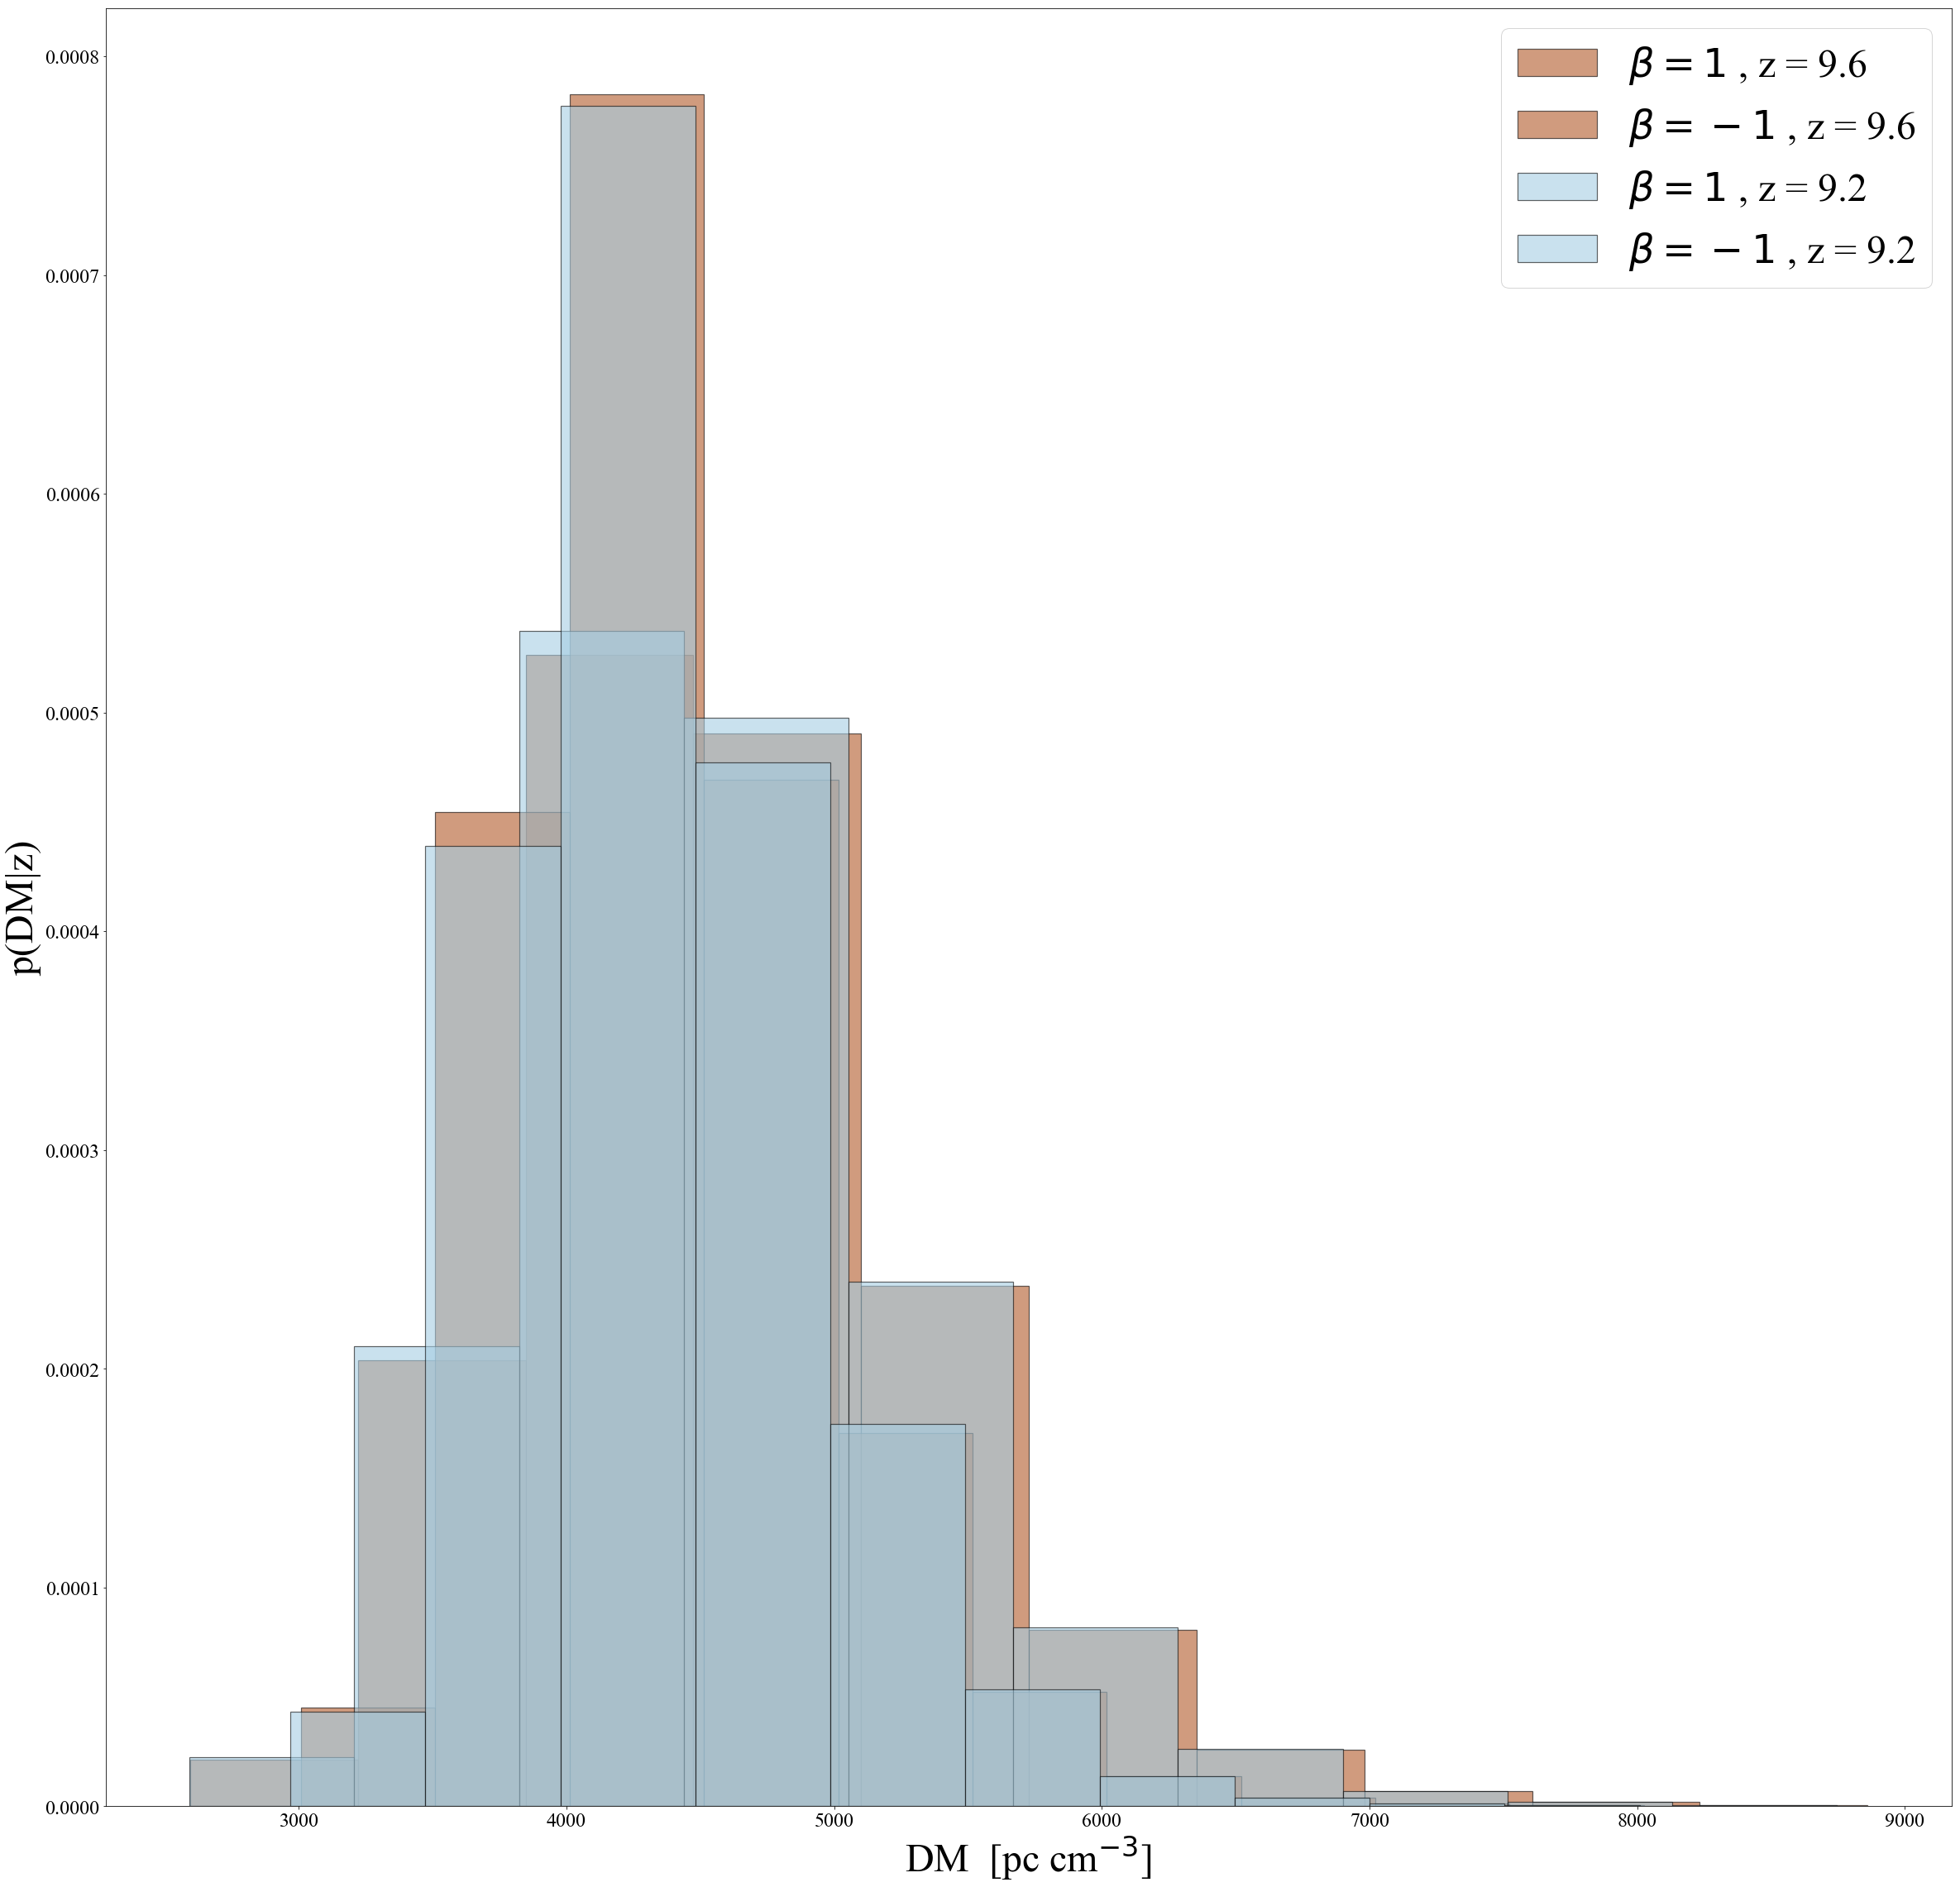

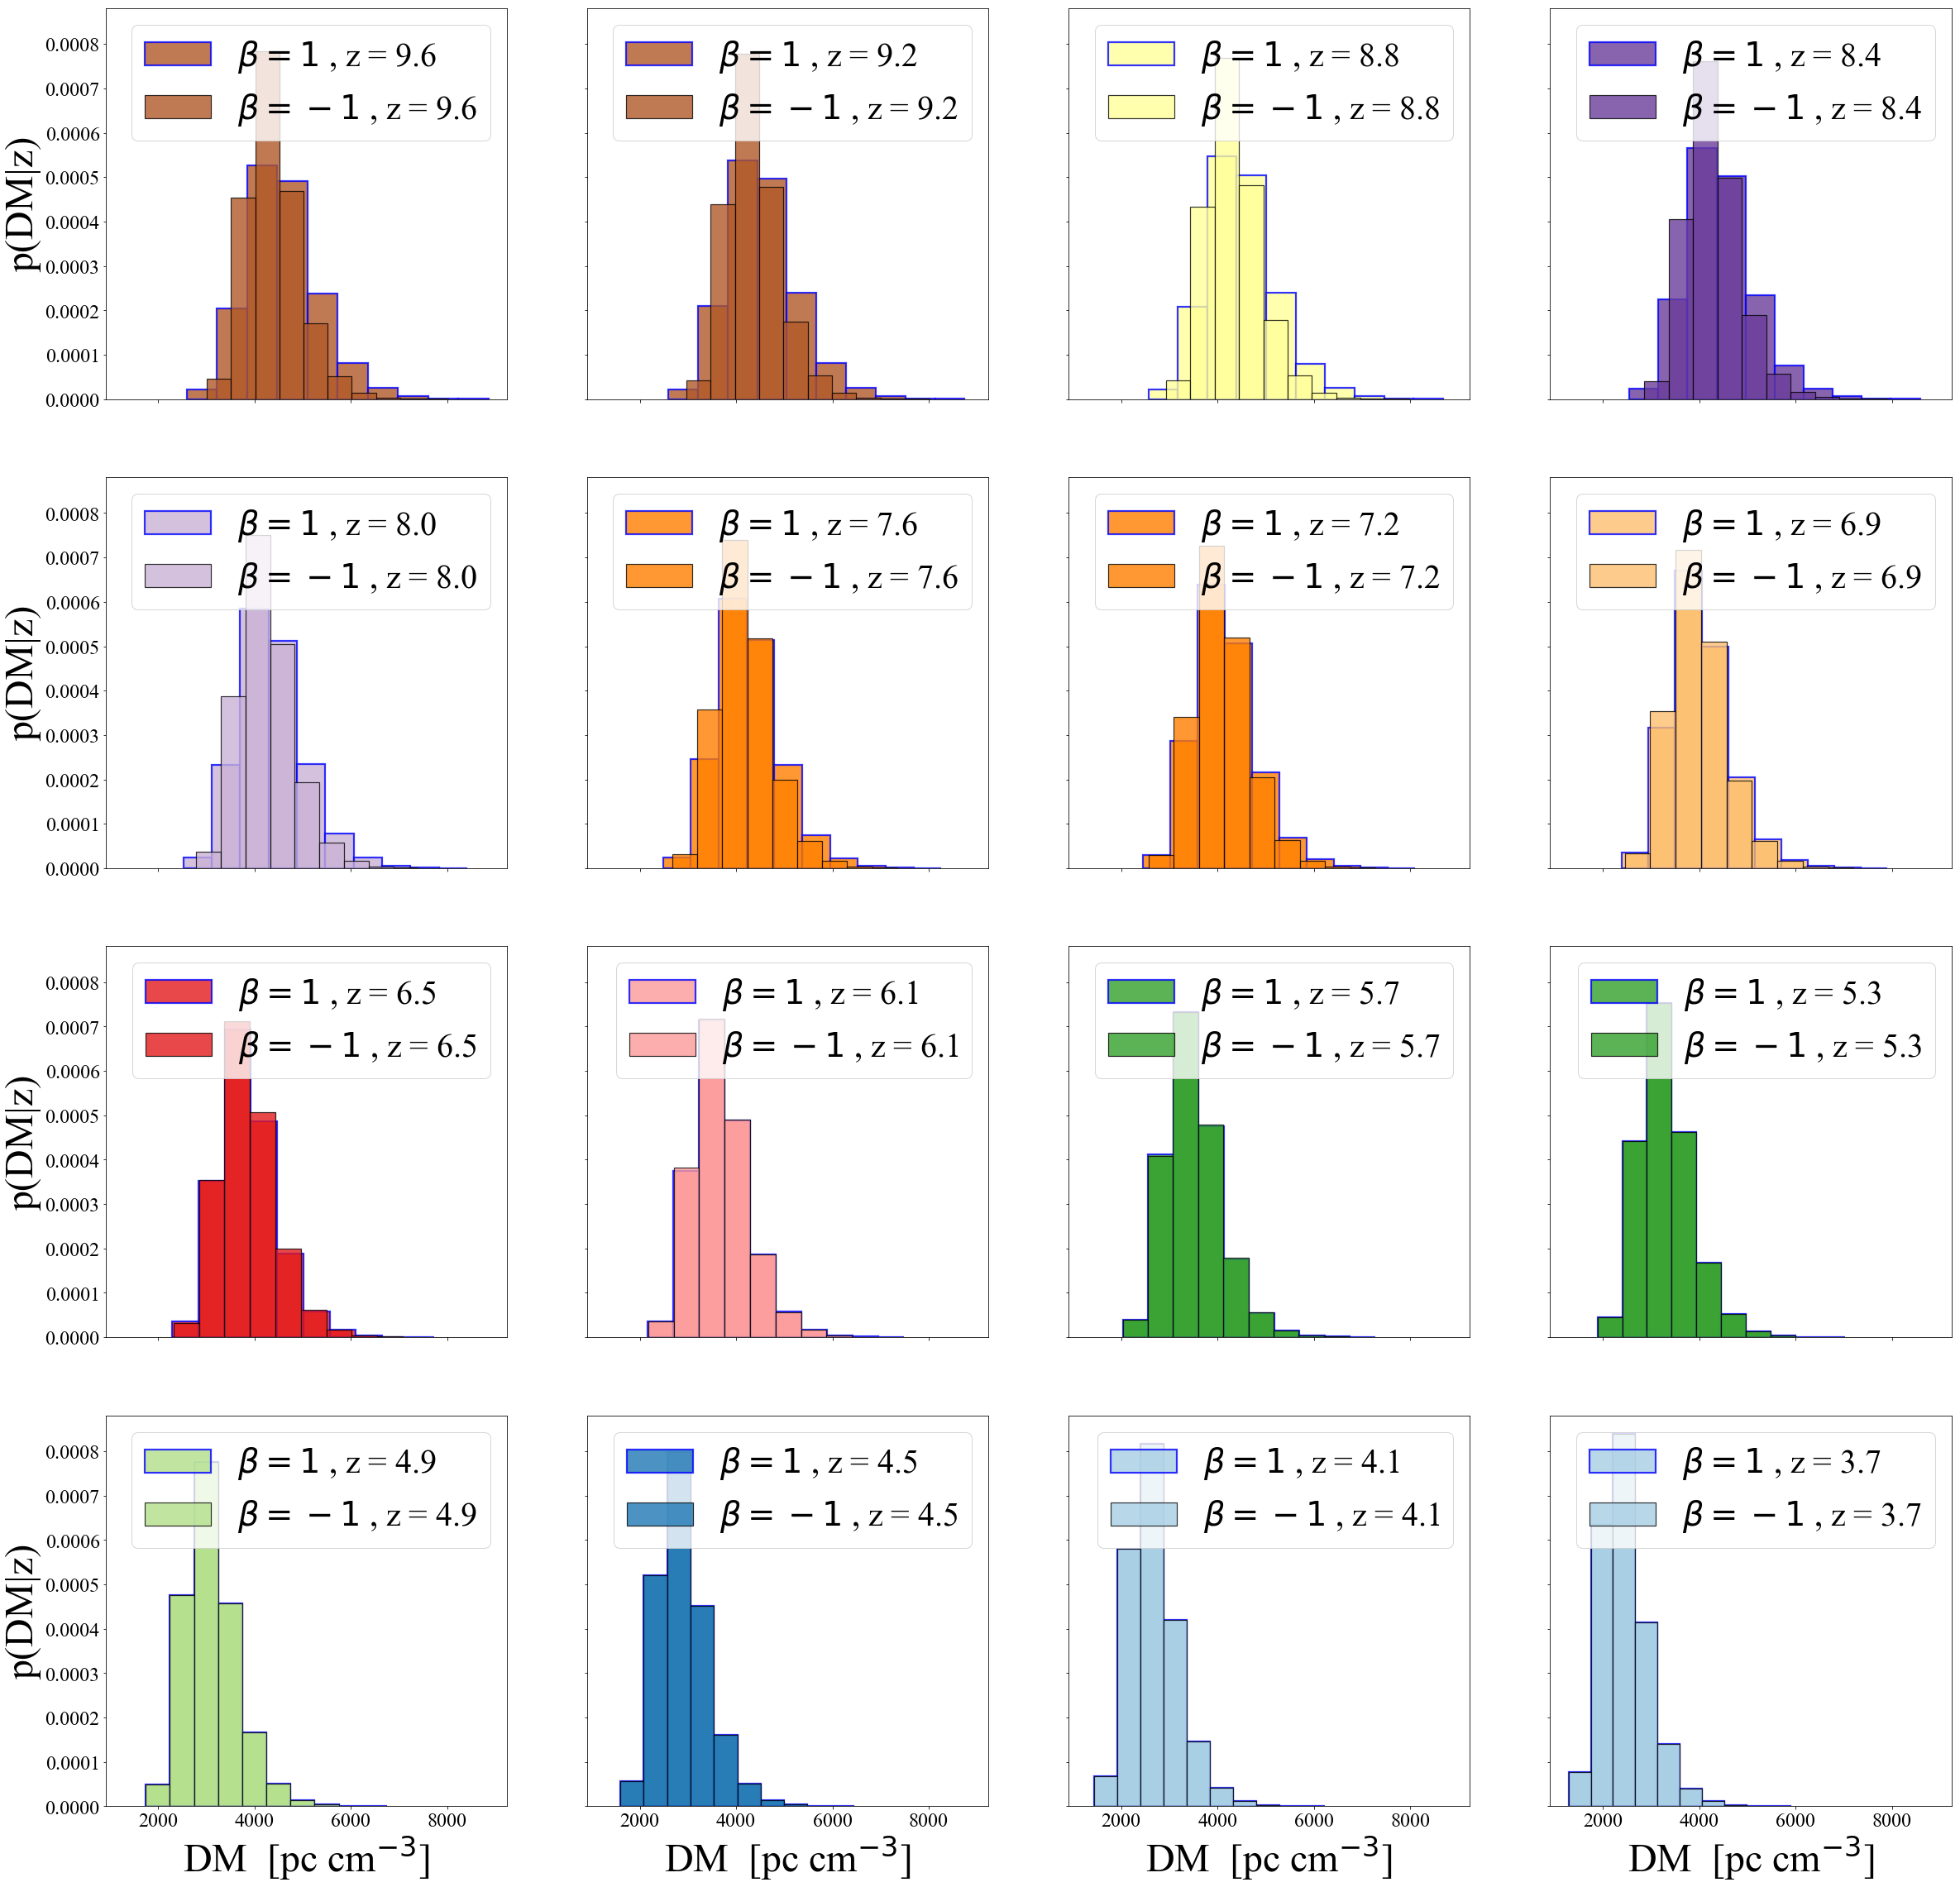

In [235]:
#this cell displays the probability distribution of DMs for a single redshift


from matplotlib import cm
from matplotlib import cm
start = 0.0
stop = 1
num_elem = 2
number_of_lines = num_elem
cm_subsection = np.linspace(start, stop, number_of_lines) 
cmap = pl.cm.Paired
cmap = cmap.reversed(pl.cm.Paired)
colors = [ cmap(x) for x in cm_subsection ]


pl.figure(figsize=(40, 40))
#f.tight_layout(pad=10.0)
for i in range(num_elem):
    non_zero_DMS_z_beta_flattened_io = ((0.01**3)*DM_z_beta_y_z[i][0].flatten()[DM_z_beta_y_z[i][0].flatten() != 0])/float(pc)
    non_zero_DMS_z_beta_flattened_oi = ((0.01**3)*DM_z_beta_y_z[i][1].flatten()[DM_z_beta_y_z[i][1].flatten() != 0])/float(pc)
    n, bins, c = pl.hist(non_zero_DMS_z_beta_flattened_io,  alpha = 0.6, color = colors[i%len(colors)], label =  str(r'$\beta = 1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))),edgecolor='black', linewidth=1.2, density = True)
    n, bins, c = pl.hist(non_zero_DMS_z_beta_flattened_oi,  alpha = 0.6, color = colors[i%len(colors)], label =  str(r'$\beta = -1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))),edgecolor='black', linewidth=1.2, density = True)
pl.xlabel(r'DM  [pc cm$^{-3}$]',  fontsize = 48)
pl.legend(prop={'size': 48})
pl.ylabel(r'p(DM|z)', x = -4.5 , fontsize = 48)
pl.show()
pl.close()





from matplotlib import cm
start = 0.0
stop = 1
num_elem = 16
number_of_lines = num_elem
cm_subsection = np.linspace(start, stop, number_of_lines) 
cmap = pl.cm.Paired
cmap = cmap.reversed(pl.cm.Paired)
colors = [ cmap(x) for x in cm_subsection ]

x_loc, y_loc = 0,0
y_dim, x_dim = 4, 4
f, axarr = pl.subplots(y_dim,x_dim,figsize=(40, 40), sharex = True , sharey= True)
#f.tight_layout(pad=10.0)
for i in range(num_elem ):
    non_zero_DMS_z_beta_flattened_io = ((0.01**3)*DM_z_beta_y_z[i][0].flatten()[DM_z_beta_y_z[i][0].flatten() != 0])/float(pc)
    non_zero_DMS_z_beta_flattened_oi = ((0.01**3)*DM_z_beta_y_z[i][1].flatten()[DM_z_beta_y_z[i][1].flatten() != 0])/float(pc)
    if i < num_elem/4.:
        x_loc, y_loc = i, 0
    if num_elem/4. <= i < num_elem/2.:
        x_loc, y_loc = i%4, 1
    if num_elem/2. <= i < 3*num_elem/4.:
        x_loc, y_loc = i%4, 2
    if 3*num_elem/4. <= i < num_elem :
        x_loc, y_loc = i%4, 3
        axarr[y_loc, x_loc].set_xlabel(r'DM  [pc cm$^{-3}$]',  fontsize = 48)
        

    axarr[y_loc, 0].set_ylabel(r'p(DM|z)', x = -4.5 , fontsize = 48)
    axarr[y_loc, x_loc].hist(non_zero_DMS_z_beta_flattened_io,  alpha = 0.8, color = colors[i%len(colors)], edgecolor='blue', linewidth=2.2 , label =  str(r'$\beta = 1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))), density = True)
    axarr[y_loc, x_loc].hist(non_zero_DMS_z_beta_flattened_oi,  alpha = 0.8, color = colors[i%len(colors)], edgecolor='black', linewidth=1.2 , label =  str(r'$\beta = -1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))), density = True)
    axarr[y_loc, x_loc].legend(prop={'size': 40})
pl.show()
pl.close()







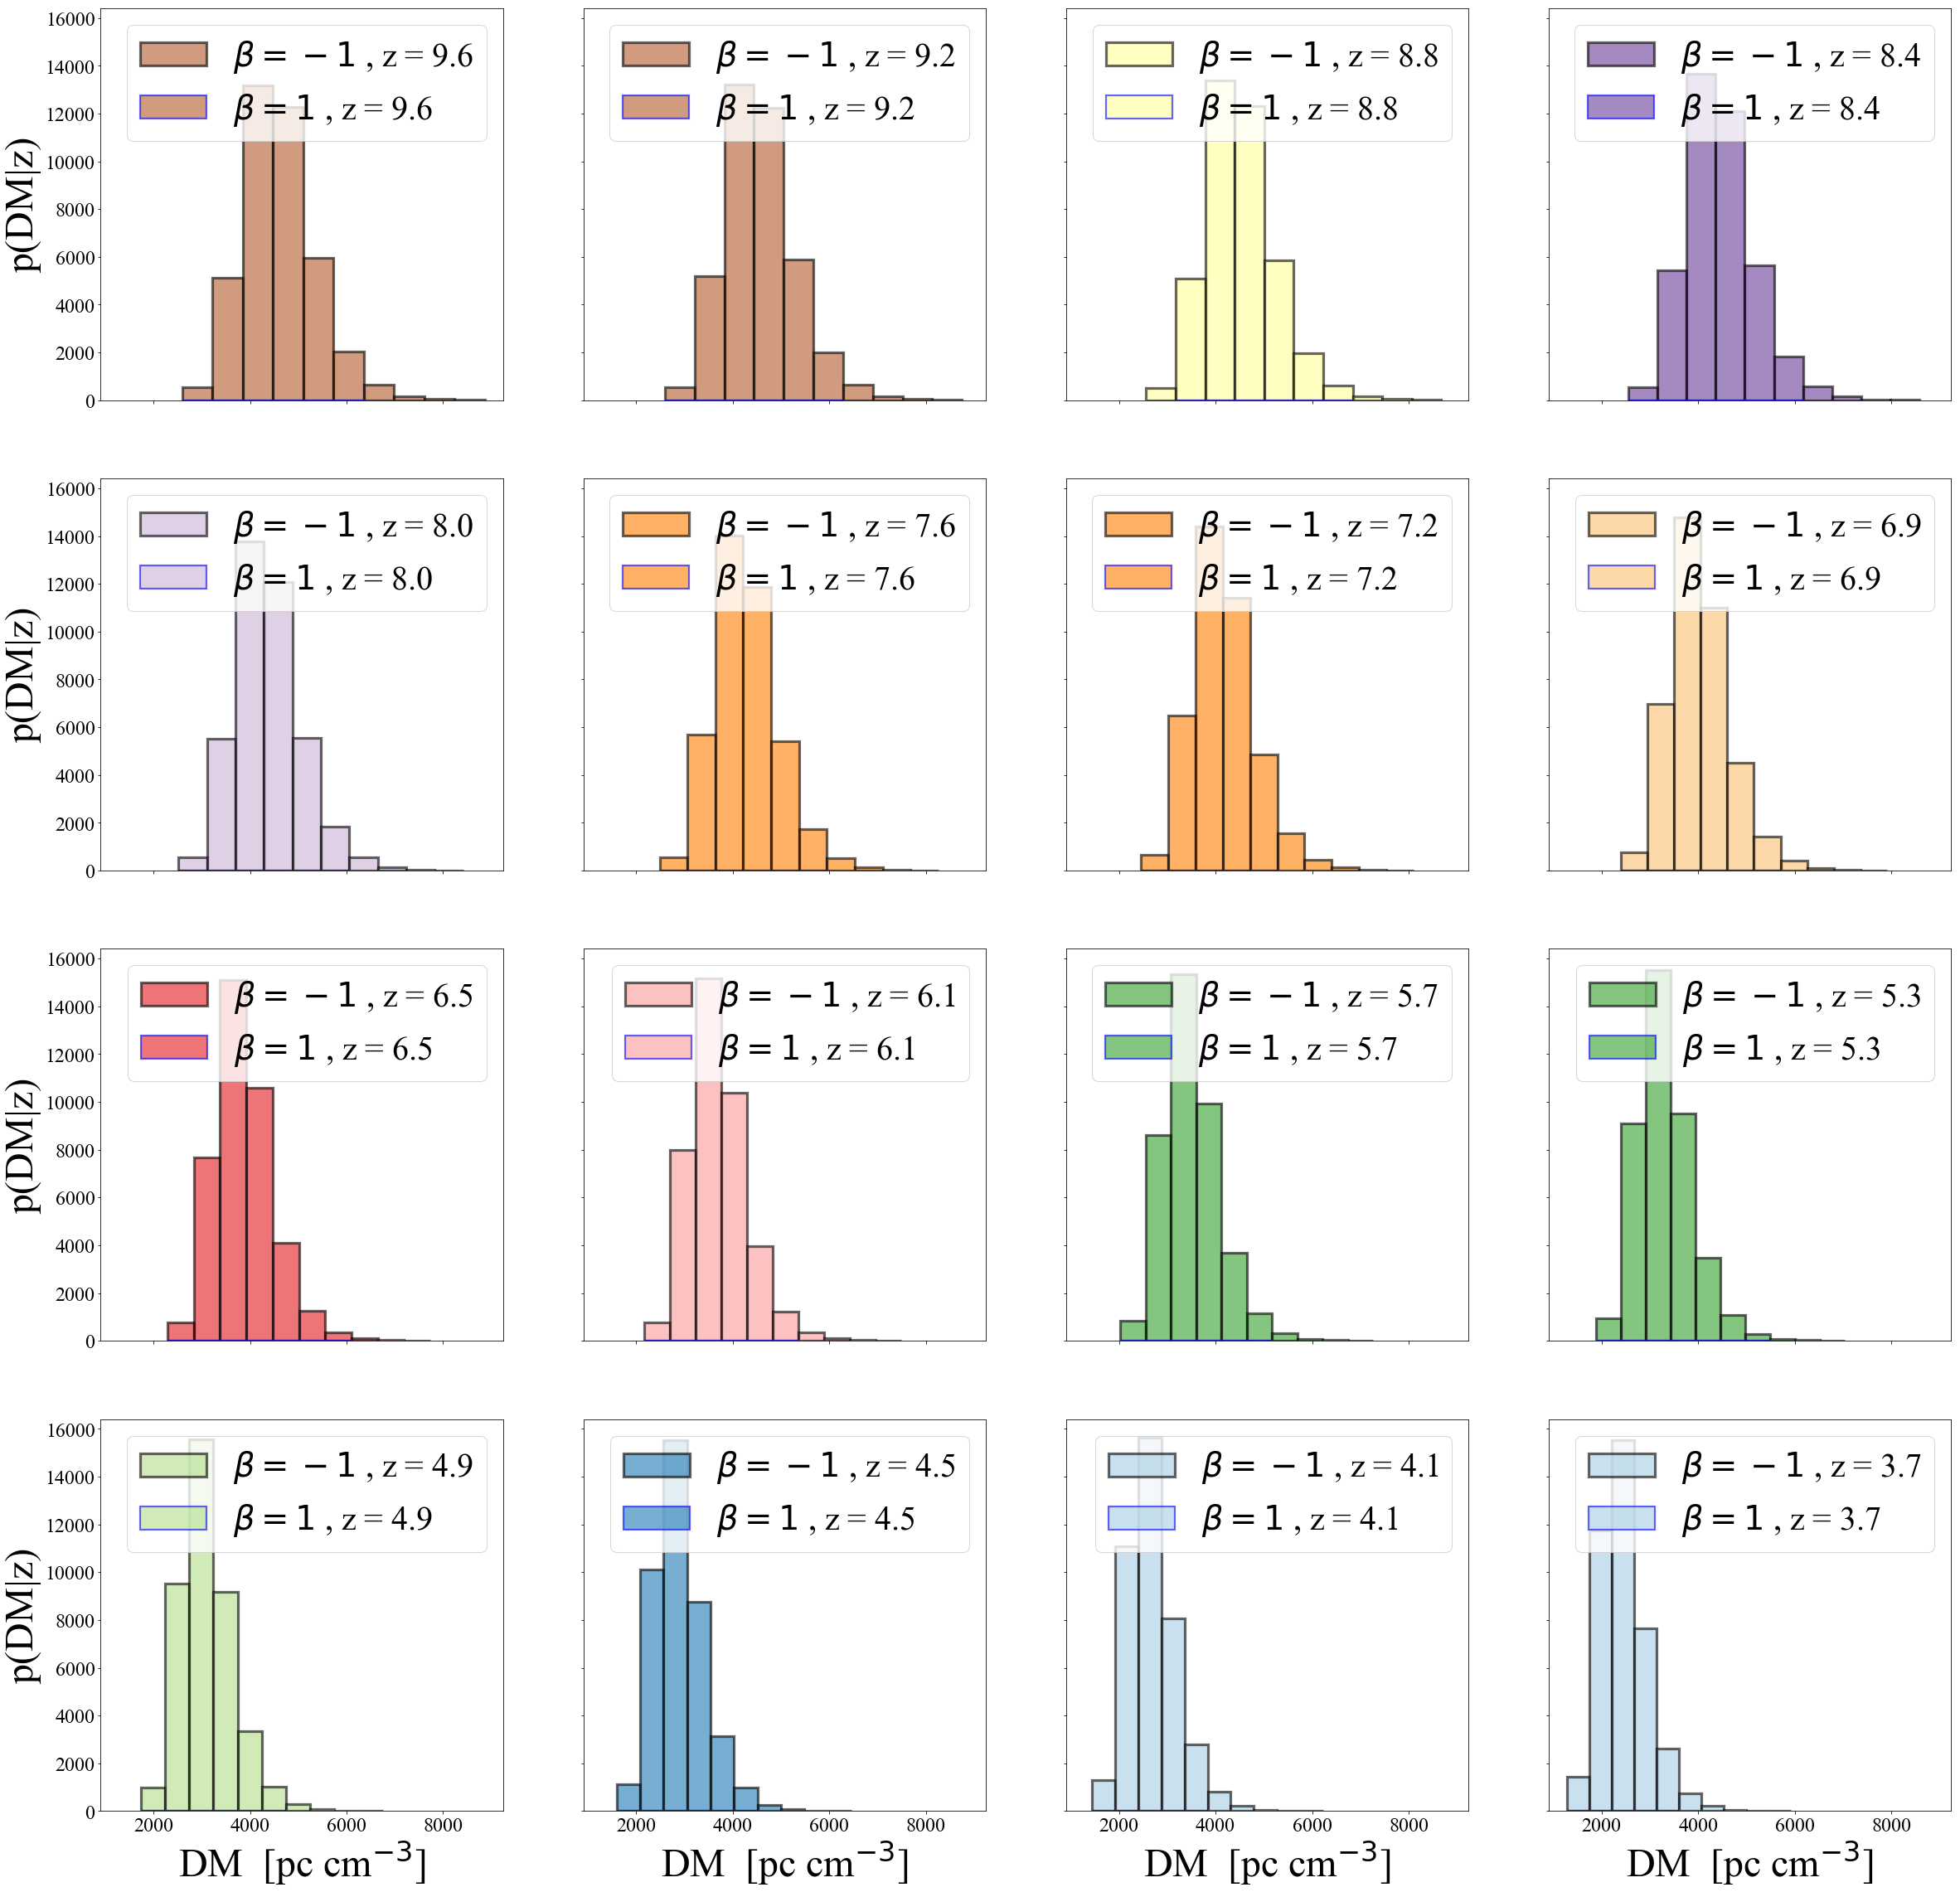

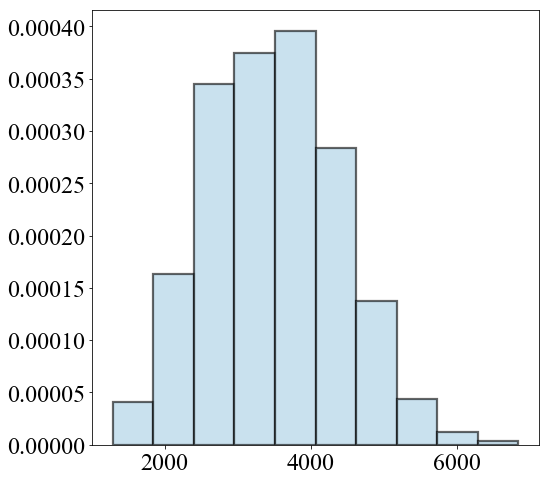

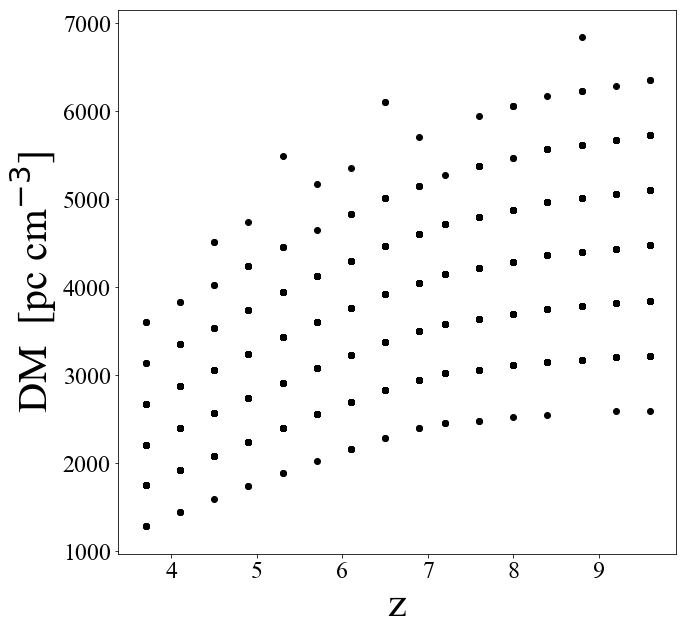

In [428]:
#fit one of the above probabilty distributions to a skew gaussians using scipy
# choose some parameters
#a, loc, scale = 1.3, -0.1, 2.2
# draw a sample
#sample = stats.skewnorm(a, loc, scale).rvs(1000)

#make an array to store the generated samples as a function of z
sample_size_per_z = 100
DM_samples_z = np.zeros((num_elem, sample_size_per_z ))
DM_samples_z_list = []

x_loc, y_loc = 0,0
y_dim, x_dim = 4, 4
f, axarr = pl.subplots(y_dim,x_dim,figsize=(40, 40), sharex = True , sharey= True)
#f.tight_layout(pad=10.0)
for i in range(num_elem ):
    non_zero_DMS_z_beta_flattened_io = ((0.01**3)*DM_z_beta_y_z[i][0].flatten()[DM_z_beta_y_z[i][0].flatten() != 0])/float(pc)
    non_zero_DMS_z_beta_flattened_oi = ((0.01**3)*DM_z_beta_y_z[i][1].flatten()[DM_z_beta_y_z[i][1].flatten() != 0])/float(pc)
    if i < num_elem/4.:
        x_loc, y_loc = i, 0
    if num_elem/4. <= i < num_elem/2.:
        x_loc, y_loc = i%4, 1
    if num_elem/2. <= i < 3*num_elem/4.:
        x_loc, y_loc = i%4, 2
    if 3*num_elem/4. <= i < num_elem :
        x_loc, y_loc = i%4, 3
        axarr[y_loc, x_loc].set_xlabel(r'DM  [pc cm$^{-3}$]',  fontsize = 48)
    
    #below assumes the probability distribution is skew gaussian  
    #a, loc, scale = stats.skewnorm.fit(non_zero_DMS_z_beta_flattened_io)
 
    
    p , bins, c =  axarr[y_loc, x_loc].hist(non_zero_DMS_z_beta_flattened_io,  alpha = 0.6, color = colors[i%len(colors)], edgecolor='black', linewidth=3.2 , label =  str(r'$\beta = -1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))))
    
    samples = np.random.choice(bins, size = sample_size_per_z, p= np.insert(p, len(p), 0)/float(len(non_zero_DMS_z_beta_flattened_io)))
    #store the samples at this z in an array 
    DM_samples_z[i] = samples
    DM_samples_z_list.append(samples)
    
    axarr[y_loc, 0].set_ylabel(r'p(DM|z)', x = -4.5 , fontsize = 48)
    axarr[y_loc, x_loc].hist(samples,  alpha = 0.6, color = colors[i%len(colors)], edgecolor='blue', linewidth=2.2 , label =  str(r'$\beta = 1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))), density = True)
    axarr[y_loc, x_loc].legend(prop={'size': 40})
pl.show()
pl.close()

#the distribution that the observer would measure
#up to what redshift can we localize the sources? That way we can kick out those z < z_localizable 
#and therefore cut out much of the riff raff
pl.figure(figsize = (8,8))
pl.hist(DM_samples_z.flatten(), alpha = 0.6, color = colors[i%len(colors)], edgecolor='black', linewidth=2.2 , label =  str(r'$\beta = 1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))), density = True)
pl.show()
pl.close()


#plot the "measurement of FRBs at each z"
y = DM_samples_z_list
x = np.round(z_we_are_actually_using,1)[0:num_elem]

pl.figure(figsize = (10,10))
for xe, ye in zip(x, y):
    pl.scatter([xe] * len(ye), ye, color = 'k')

pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()
#pl.xticks(np.round(z_we_are_actually_using,1))
#pl.axes().set_xticklabels(np.round(z_we_are_actually_using,1))











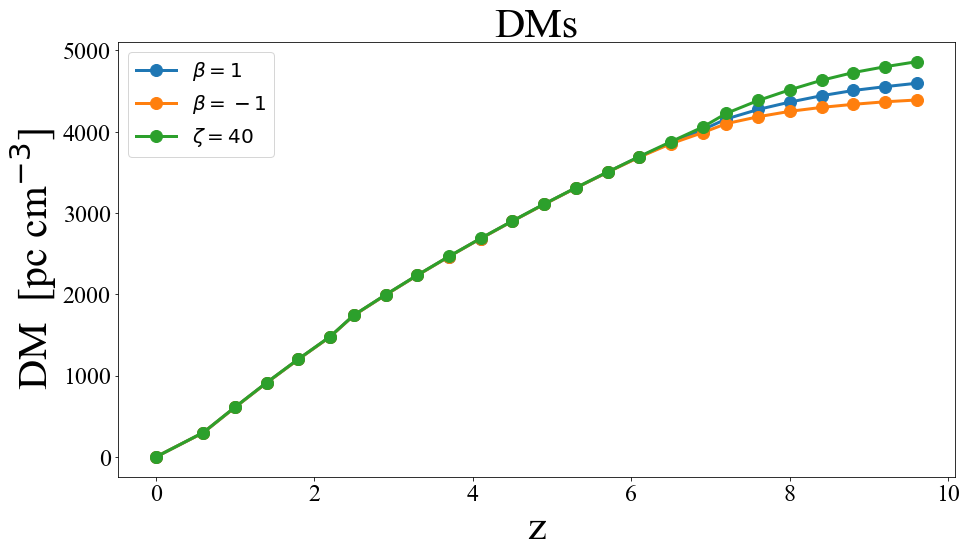

In [475]:

#plot
pl.figure(figsize = (15,8))
pl.plot(np.round(z_we_are_actually_using,1), (0.01**3)*np.divide(np.sum(DM_z_beta_y_z, axis = (2,3))[:,0], (HII_DIM*HII_DIM*pc)),  marker = 'o',markersize = 12, linewidth=3., label = r'$\beta = 1$' )
pl.plot(np.round(z_we_are_actually_using,1), (0.01**3)*np.divide(np.sum(DM_z_beta_y_z, axis = (2,3))[:,1], (HII_DIM*HII_DIM*pc)),  marker = 'o',markersize = 12, linewidth=3., label = r'$\beta = -1$' )
pl.plot(np.round(z_we_are_actually_using,1), np.append((0.01**3)*np.divide(np.sum(DM_theta_y_z, axis = (1,2)), (HII_DIM*HII_DIM*pc)),0),  marker = 'o',markersize = 12, linewidth=3., label = r'$\zeta = 40$' )
pl.title(r'DMs', fontsize = 42)
pl.legend(prop={'size': 20})
#pl.xlim(6,10)
#pl.ylim(3500,5000)
#pl.gca().invert_yaxis()
#pl.gca().invert_xaxis()
pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()

In [497]:
#save all LoS
np.savez('DM_z_all_LoS'+str(DATE)+'.npz', DM_z_beta_y_z = DM_z_beta_y_z, z_we_are_actually_using= z_we_are_actually_using )

IOError: Failed to write to /Users/michael/Research/FRB/DM_z_all_LoS2020-11-10.npzNyiBXB-numpy.npy: [Errno 28] No space left on device

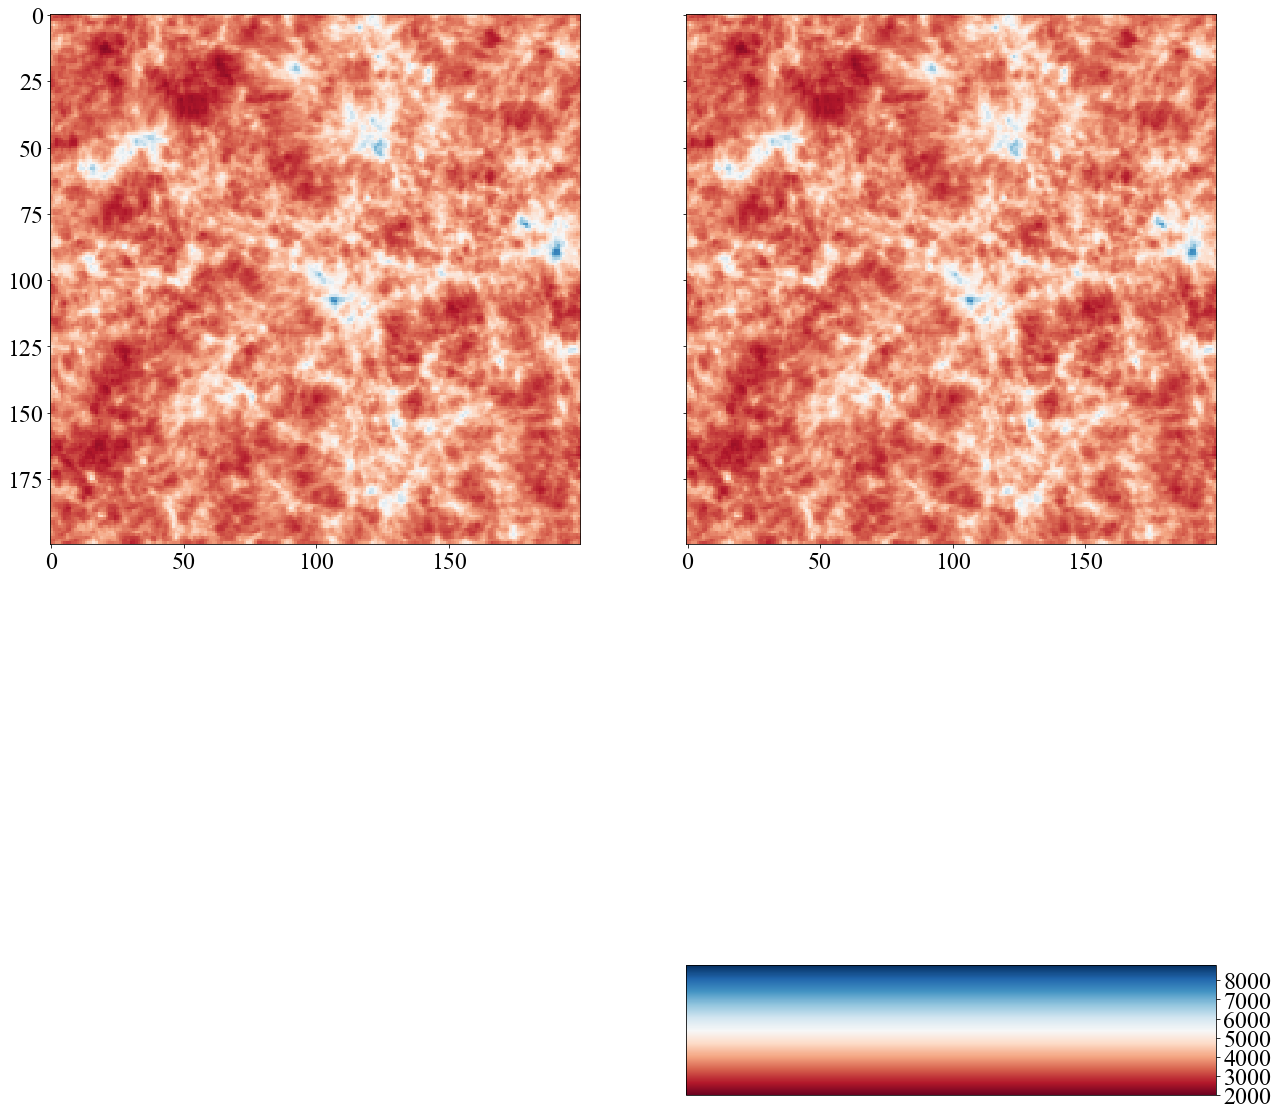

In [322]:
#DM contrast map between EoR Models
A = np.load("DM_z_all_LoS.npz")
DMs = A['DM_z_beta_y_z']


nrows, ncols = 1, 2
f, axarr = pl.subplots(nrows, ncols, figsize=(24,24 ), sharey= True)
for i in range(ncols):
    im1=axarr[i].imshow((0.01**3)*DMs[8][i]/(pc), cmap = 'RdBu', vmin = 2000, vmax = 8800)
f.subplots_adjust(right=0.8)
#cbar_ax = f.add_axes([0.89, 0.95, 0.01, 0.1])
left, bottom, width, height = axarr[1].get_position().bounds
cax = f.add_axes([left, 0.03, width, height * 0.1])
f.colorbar(im1, cax = cax)
pl.show()
pl.close()



(array([1.64544250e-04, 1.64544250e-04, 8.22721249e-05, 1.64544250e-04,
        1.64544250e-04, 2.46816375e-04, 1.64544250e-04, 2.46816375e-04,
        1.64544250e-04, 4.93632750e-04]),
 array([   0.        ,  486.19140491,  972.38280982, 1458.57421473,
        1944.76561964, 2430.95702456, 2917.14842947, 3403.33983438,
        3889.53123929, 4375.7226442 , 4861.91404911]),
 <a list of 10 Patch objects>)

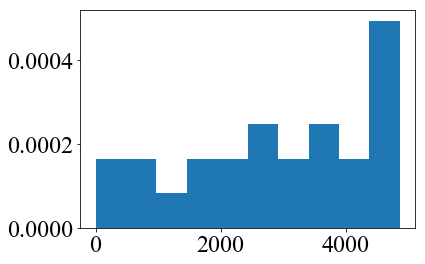

In [474]:
pl.hist(np.append((0.01**3)*np.divide(np.sum(DM_theta_y_z, axis = (1,2)), (HII_DIM*HII_DIM*pc)),0).flatten(), density = True)

-rw-r--r--  1 michael  staff    15M  5 Nov 09:31 DM_z_all_LoS.npz
-rw-r--r--  1 michael  staff   336M 16 Oct 12:42 DMs_avg_all_sightlines.npz
-rw-r--r--  1 michael  staff   3.3G 12 Oct 19:15 Lightcone_xH_delta.npz


In [461]:
#this is the exact same DM calculator as above, however this is just a dummy cell for computing 
#the DM for some other EoR parameter set to include in the above plots, this cell can be deleted without any
#change in functionality of above. Notice the differnt array names to not interfere with the other cells/information
#only run this cell once to compute the lightcone, then save it in the folder

b_loc = '/Volumes/Tubster/FRB_boxes/1_40_5e8_30/'
z_end = 0.2
nboxes = np.round(float(z_range_of_halo_boxes[0])/float(z_end),1)


#make the lightcone for each quantity
box_slice = HII_DIM - i -1
_xH_lightcone_1_40_5e8_30, lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_range_of_boxes = np.linspace(np.max(z_range_of_halo_boxes), z_end, nboxes), box_slice = int(box_slice), directory =  b_loc, return_redshifts = True )

_densitylightcone_1_40_5e8_30= lc.lightcone(DIM = HII_DIM, z_range_of_boxes = np.linspace(np.max(z_range_of_halo_boxes), z_end, nboxes), box_slice = int(box_slice), directory = b_loc , marker = 'updated_smoothed_deltax')

print('Done!')

np.savez('/Volumes/Tubster/FRB_boxes/1_40_5e8_30/l_40_5e8_30.npz', xH_lightcone =  _xH_lightcone_beta_ , delta_lightcone = _densitylightcone_beta_)






/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
(9.6, 0.2, 48)
[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]


/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
(9.6, 0.2, 48)
[9.6 9.4 9.2 9.  8.8 8.6 8.4 8.2 8.  7.8 7.6 7.4 7.2 7.  6.8 6.6 6.4 6.2
 6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
Done!


In [464]:
#this is the exact same DM calculator as above, however this is just a dummy cell for computing 
#the DM for some other EoR parameter set to include in the above plots, this cell can be deleted without any
#change in functionality of above. Notice the differnt array names to not interfere with the other cells/information
DM_theta_y_z = np.zeros((24, HII_DIM, HII_DIM  ))
theta_n_FRBs_z = np.zeros((24))
theta_z_we_are_actually_using = np.zeros((24))
#start with z = 9.6 for now (redshift = 0 index)
for red_idx in range(24):
    red = int(red_idx*100)
    theta_z_we_are_actually_using[red_idx] =  lightcone_redshifts[red]
    print('Doing z' , lightcone_redshifts[red])
    for y in range(HII_DIM):
        for z in range(HII_DIM):
            #if Halo_lightcone[red][y][z] != 0:
            #    n_FRBs_z[red_idx] += 1
            #for b in range(len(betas)):
                DM_theta_y_z[red_idx][y][z] = DM.compute_DM(y,z,_xH_lightcone_1_40_5e8_30[red:,:,], _densitylightcone_1_40_5e8_30[red:,:,],  lightcone_redshifts[red:], Halo_lightcone[red:])    
    #if the previous sum over all LoS is less than this sum of all LoS (at lower z), then raise flag
    print(0.01**3*np.sum(DM_theta_y_z[red_idx])/(theta_n_FRBs_z[red_idx]*pc), theta_n_FRBs_z[red_idx])
    
    if np.sum(DM_theta_y_z[red_idx])/(theta_n_FRBs_z[red_idx]) > (np.sum(DM_theta_y_z[red_idx-1])/(theta_n_FRBs_z[red_idx-1])) and red_idx > 0:
        print('sound the alarm')
        print(red, lightcone_redshifts[red], np.sum(DM_theta_y_z[red_idx]), np.sum(DM_theta_y_z[red_idx-1]) )
        
    print('Done ' + str(lightcone_redshifts[red]))


    
#save all LoS
np.savez('/Volumes/Tubster/FRB_boxes/1_40_5e8_30/DM_z_all_LoS_1_40_5e8_30.npz', DM_theta_y_z = DM_theta_y_z, theta_z_we_are_actually_using= theta_z_we_are_actually_using )
    

('Doing z', 9.6)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2399)
('starting at 9.6 and ending at 0.20391829929137195 in steps of 0.003918299291370886', 

/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


(inf, 0.0)
Done 9.6
('Doing z', 9.20817007086286)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2299)
('starting at 9.20817007086286 and ending at 0.20391829929137195 in steps o

('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)
('starting at 8.81634014172572 and ending at 0.20391829929137195 in steps of 0.003918299291372662', ' for a total of', 2199)


('starting at 8.424510212588578 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 2099)
(inf, 0.0)
Done 8.424510212588578
('Doing z', 8.032680283451437)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1999)
('starting at 8.032680283451437 and ending at 0.20391

('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1899)
('starting at 7.640850354314297 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

(inf, 0.0)
Done 7.249020425177157
('Doing z', 6.857190496040016)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1699)
('starting at 6.857190496040016 and ending at 0.20391

('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
('starting at 6.465360566902876 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1599)
(inf, 0.0)
Done 6.465360566902876
('Doing z', 6.073530637765735)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1499)
('starting at 6.073530637765735 and ending at 0.20391

('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1399)
('starting at 5.681700708628595 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 1199)
('starting at 4.898040850354314 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of'

('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 1099)
('starting at 4.506210921217174 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of'

('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
('starting at 4.114380992080033 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 999)
(inf, 0.0)
Done 4.114380992080033
('Doing z', 3.722551062942893)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 899)
('starting at 3.722551062942893 and ending at 0.203918299291

('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 799)
('starting at 3.3307211338057527 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of

('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 599)
('starting at 2.5470612755314717 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of

('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
('starting at 2.1552313463943307 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 499)
(inf, 0.0)
Done 2.1552313463943307
('Doing z', 1.7634014172571906)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20391829929137195 in steps of 0.003918299291371774', ' for a total of', 399)
('starting at 1.7634014172571906 and ending at 0.20

('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 299)
('starting at 1.3715714881200505 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of

('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)
('starting at 0.5879116298457685 and ending at 0.20391829929137195 in steps of 0.003918299291370886', ' for a total of', 99)


/Users/michael/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


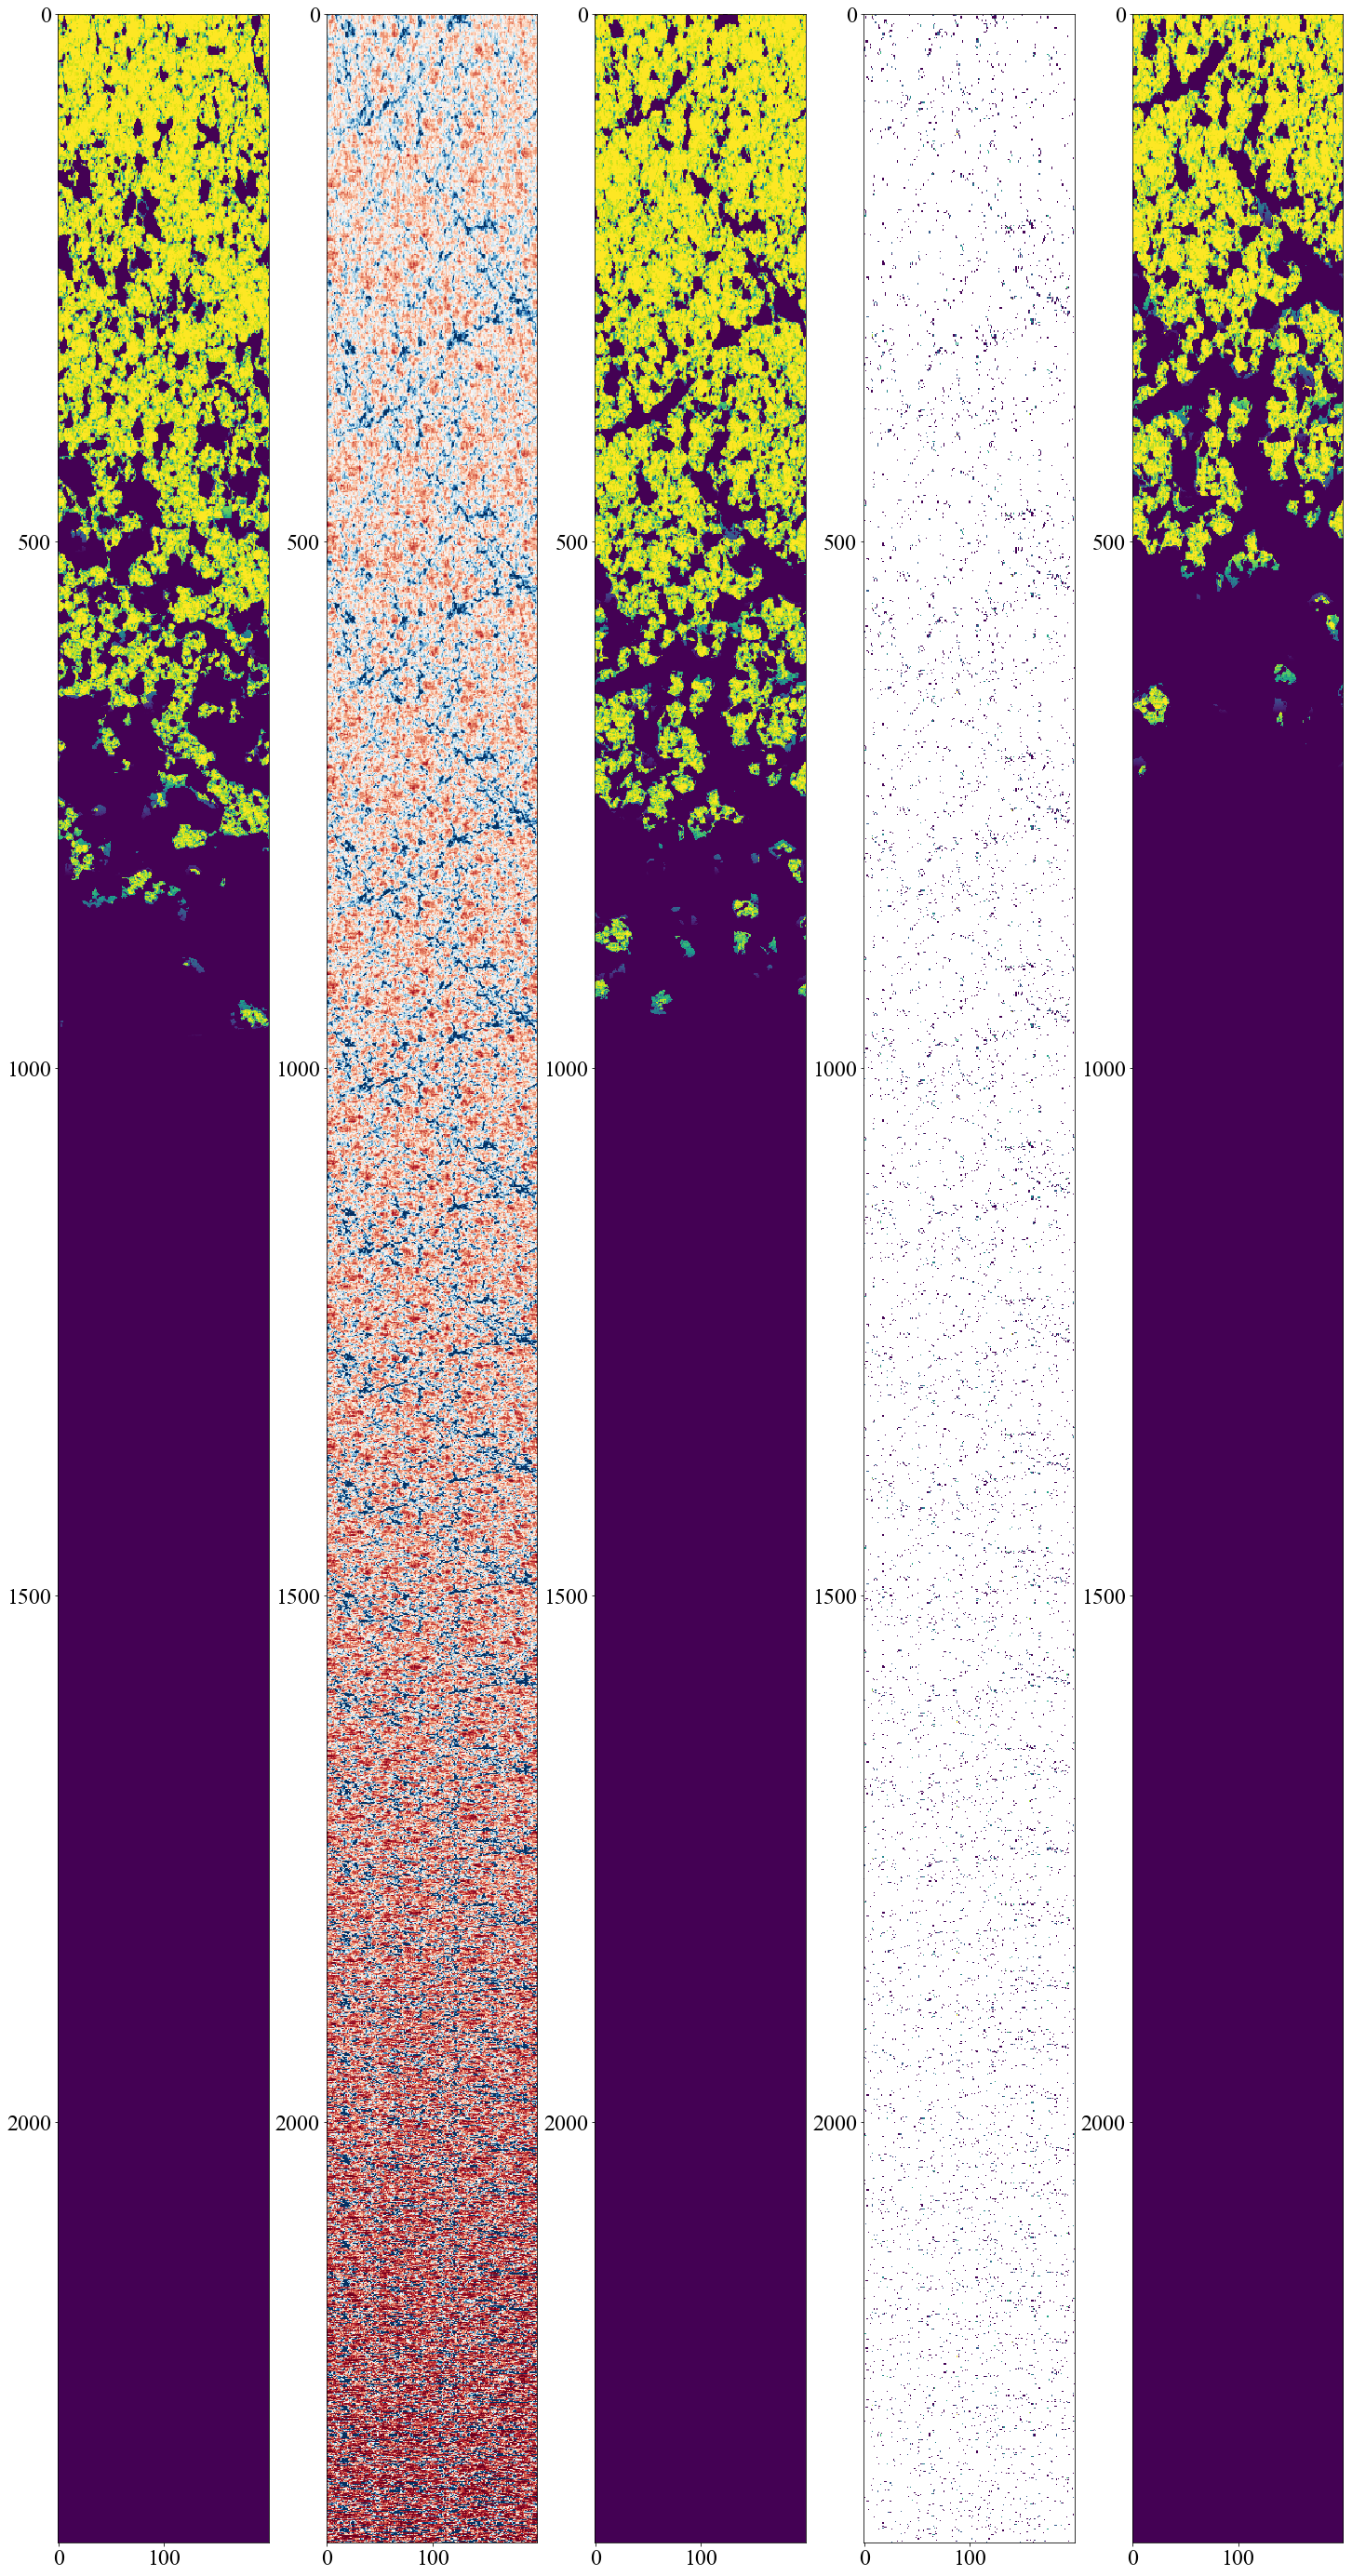

In [463]:
#double check the lightcones

fig, (ax1, ax2, ax3, ax4, ax5) = pl.subplots(1, 5)
fig.set_figheight(50)
fig.set_figwidth(25)
ax1.imshow(xH_lightcone_beta_Dictionary['-1'][:,0,], aspect = 1)
ax2.imshow(densitylightcone_beta_Dictionary['1'][:,0,], cmap = 'RdBu', vmin = np.min(densitylightcone_beta_Dictionary['1'][:,0,]), vmax = 1 )
ax3.imshow(xH_lightcone_beta_Dictionary['1'][:,0,], aspect = 1)
ax4.imshow(np.log(Halo_lightcone[:,0,]), cmap = 'viridis', aspect = 1)
ax5.imshow(_xH_lightcone_1_40_5e8_30[:,0,], cmap = 'viridis', aspect = 1)
y_positions = np.arange(0,lightcone_redshifts.shape[0],10)
#ax1.set_yticklabels(y_positions, np.round(lightcone_redshifts[::10],2))
#ax2.set_yticklabels(y_positions, np.round(lightcone_redshifts[::10],2))


pl.show()
pl.close()

In [8]:
#!!!!!!!!!!!!DELETE EVERYTHING BELOW > SAME AS ABOVE > JUST VERIFYING A FEW THINGS ON NOV 24!!!

#fit one of the above probabilty distributions to a skew gaussians using scipy
# choose some parameters
#a, loc, scale = 1.3, -0.1, 2.2
# draw a sample
#sample = stats.skewnorm(a, loc, scale).rvs(1000)

npzfile = np.load('DM_z_all_LoS2020-11-10.npz', allow_pickle = True)
DM_z_beta_y_z = npzfile['DM_z_beta_y_z']
z_we_are_actually_using = npzfile['z_we_are_actually_using']







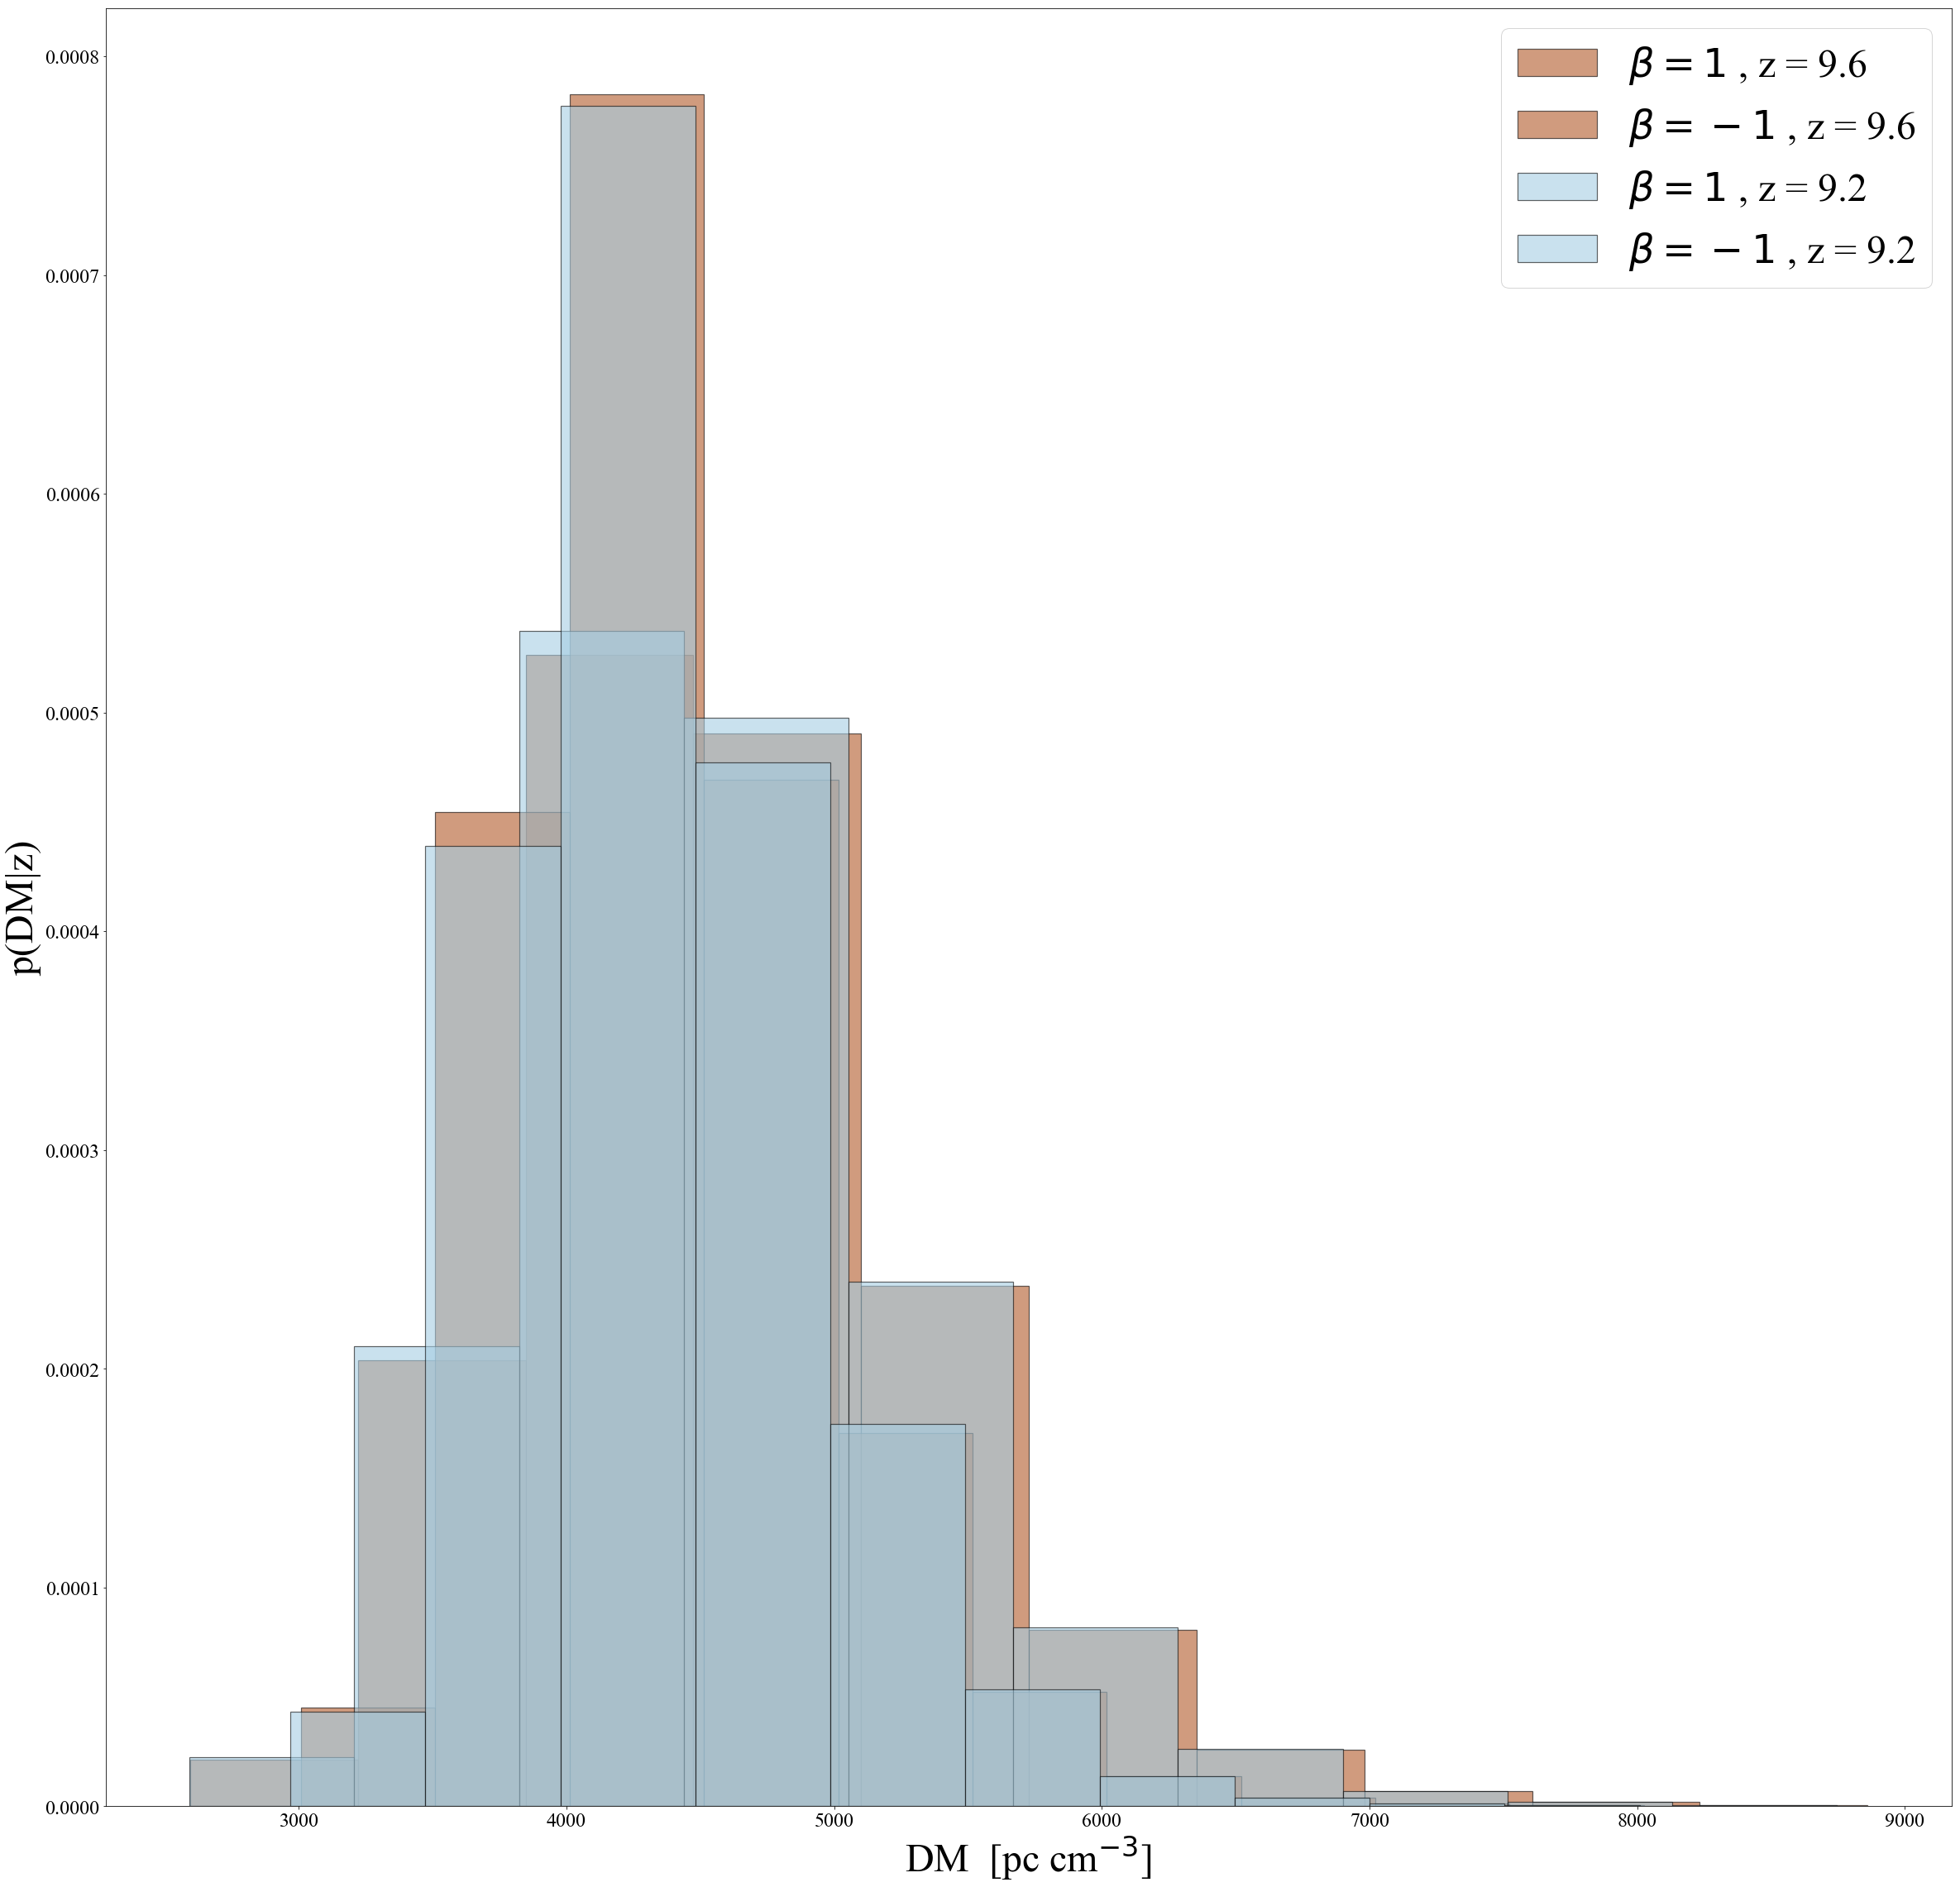

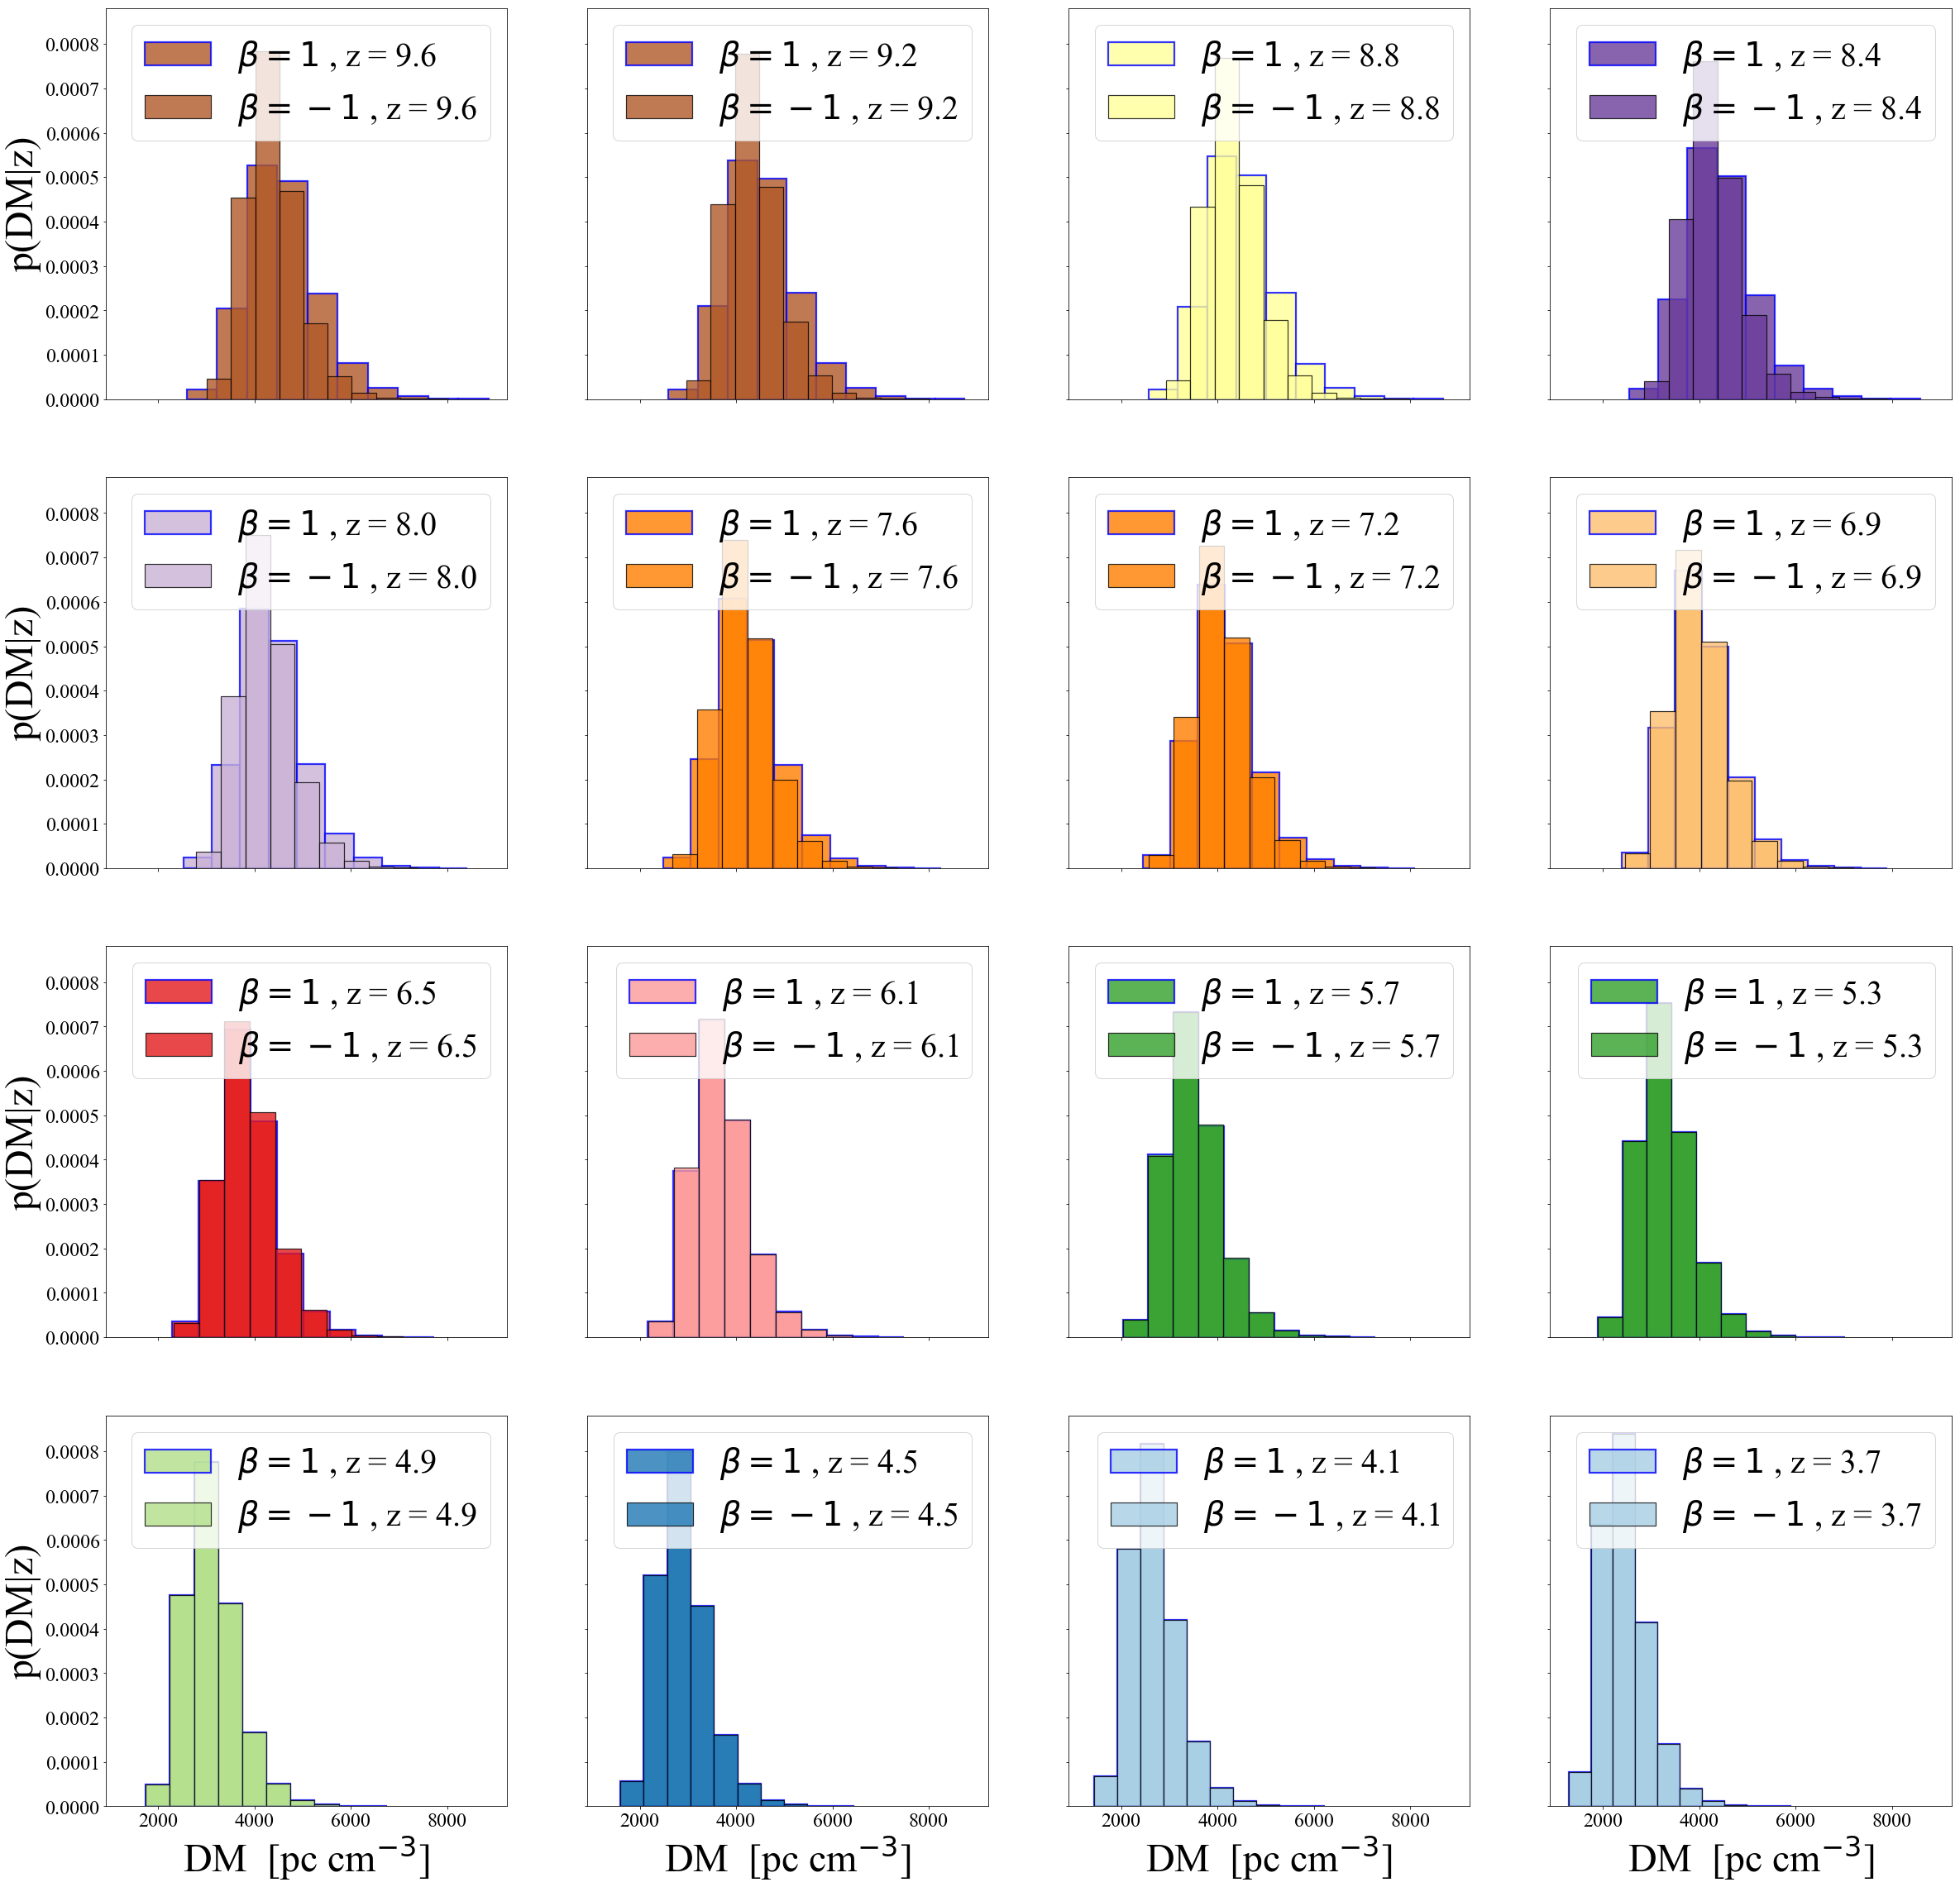

In [7]:
#this cell displays the probability distribution of DMs for a single redshift


from matplotlib import cm
from matplotlib import cm
start = 0.0
stop = 1
num_elem = 2
number_of_lines = num_elem
cm_subsection = np.linspace(start, stop, number_of_lines) 
cmap = pl.cm.Paired
cmap = cmap.reversed(pl.cm.Paired)
colors = [ cmap(x) for x in cm_subsection ]


pl.figure(figsize=(40, 40))
#f.tight_layout(pad=10.0)
for i in range(num_elem):
    non_zero_DMS_z_beta_flattened_io = ((0.01**3)*DM_z_beta_y_z[i][0].flatten()[DM_z_beta_y_z[i][0].flatten() != 0])/float(pc)
    non_zero_DMS_z_beta_flattened_oi = ((0.01**3)*DM_z_beta_y_z[i][1].flatten()[DM_z_beta_y_z[i][1].flatten() != 0])/float(pc)
    n, bins, c = pl.hist(non_zero_DMS_z_beta_flattened_io,  alpha = 0.6, color = colors[i%len(colors)], label =  str(r'$\beta = 1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))),edgecolor='black', linewidth=1.2, density = True)
    n, bins, c = pl.hist(non_zero_DMS_z_beta_flattened_oi,  alpha = 0.6, color = colors[i%len(colors)], label =  str(r'$\beta = -1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))),edgecolor='black', linewidth=1.2, density = True)
pl.xlabel(r'DM  [pc cm$^{-3}$]',  fontsize = 48)
pl.legend(prop={'size': 48})
pl.ylabel(r'p(DM|z)', x = -4.5 , fontsize = 48)
pl.show()
pl.close()





from matplotlib import cm
start = 0.0
stop = 1
num_elem = 16
number_of_lines = num_elem
cm_subsection = np.linspace(start, stop, number_of_lines) 
cmap = pl.cm.Paired
cmap = cmap.reversed(pl.cm.Paired)
colors = [ cmap(x) for x in cm_subsection ]

x_loc, y_loc = 0,0
y_dim, x_dim = 4, 4
f, axarr = pl.subplots(y_dim,x_dim,figsize=(40, 40), sharex = True , sharey= True)
#f.tight_layout(pad=10.0)
for i in range(num_elem ):
    non_zero_DMS_z_beta_flattened_io = ((0.01**3)*DM_z_beta_y_z[i][0].flatten()[DM_z_beta_y_z[i][0].flatten() != 0])/float(pc)
    non_zero_DMS_z_beta_flattened_oi = ((0.01**3)*DM_z_beta_y_z[i][1].flatten()[DM_z_beta_y_z[i][1].flatten() != 0])/float(pc)
    if i < num_elem/4.:
        x_loc, y_loc = i, 0
    if num_elem/4. <= i < num_elem/2.:
        x_loc, y_loc = i%4, 1
    if num_elem/2. <= i < 3*num_elem/4.:
        x_loc, y_loc = i%4, 2
    if 3*num_elem/4. <= i < num_elem :
        x_loc, y_loc = i%4, 3
        axarr[y_loc, x_loc].set_xlabel(r'DM  [pc cm$^{-3}$]',  fontsize = 48)
        

    axarr[y_loc, 0].set_ylabel(r'p(DM|z)', x = -4.5 , fontsize = 48)
    axarr[y_loc, x_loc].hist(non_zero_DMS_z_beta_flattened_io,  alpha = 0.8, color = colors[i%len(colors)], edgecolor='blue', linewidth=2.2 , label =  str(r'$\beta = 1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))), density = True)
    axarr[y_loc, x_loc].hist(non_zero_DMS_z_beta_flattened_oi,  alpha = 0.8, color = colors[i%len(colors)], edgecolor='black', linewidth=1.2 , label =  str(r'$\beta = -1$ , z = {}' .format(np.round(z_we_are_actually_using[i],1))), density = True)
    axarr[y_loc, x_loc].legend(prop={'size': 40})
pl.show()
pl.close()







5918.983849290209


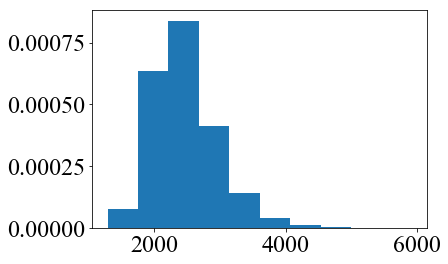

(3.3606799088674215, 1895.1657671380367, 751.626767443966)


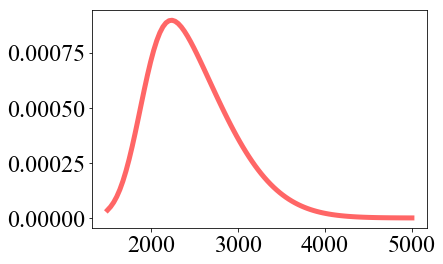

0.042080566564119105
11.966450047531914
64.98518974619034


In [39]:
non_zero_DMS_z_beta_flattened_io = ((0.01**3)*DM_z_beta_y_z[i][0].flatten()[DM_z_beta_y_z[i][0].flatten() != 0])/float(pc)
print(np.max(non_zero_DMS_z_beta_flattened_io))
n, bins , c = pl.hist(non_zero_DMS_z_beta_flattened_io, density = True)
pl.show()
pl.close()

from scipy import stats

ae, loce, scalee = stats.skewnorm.fit(non_zero_DMS_z_beta_flattened_io)

print(ae, loce, scalee)

x = np.linspace(1500,5000, 100)
pl.plot(x, stats.skewnorm.pdf(x, ae, loce,scalee),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')
pl.show()
pl.close()

print(2000*stats.skewnorm.pdf(4000, ae, loce,scalee))
print(-np.log(stats.skewnorm.pdf(4300, ae, loce,scalee)))
print(-np.log(stats.skewnorm.pdf(10000, ae, loce,scalee)))





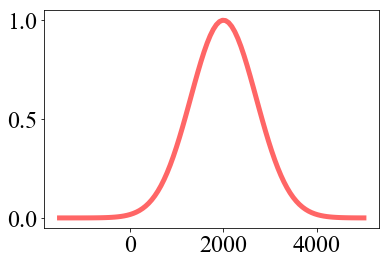

0.9995836360706275


In [44]:
x = np.linspace(-1500,5000, 100)
pl.plot(x, np.sqrt(2*np.pi*700**2)*stats.skewnorm.pdf(x, 0, 2000,700),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')
pl.show()
pl.close()

print(np.max(np.sqrt(2*np.pi*700**2)*stats.skewnorm.pdf(x, 0, 2000,700)))

ae, loce, scalee = stats.skewnorm.fit(non_zero_DMS_z_beta_flattened_io)


